<a href="https://colab.research.google.com/github/juangarcesco/PROYECTO_CALL_CENTER/blob/main/PRUEBA_CALL_CENTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRELIMINARES**

## Importacion de librerias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from scipy.stats import zscore

## Paleta de colores

In [76]:
paleta_de_colores = [
    "#FF0000",  # Rojo
    "#0000FF",  # Azul
    "#FFFF00",  # Amarillo
    "#00FF00",  # Verde
    "#00FFFF",  # Cian
    "#FF00FF",  # Magenta
    "#FFA500",  # Naranja
    "#800080",  # Púrpura
    "#008000"   # Verde oscuro
    ]

## Carga de datos csv

In [77]:
df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=";", low_memory=False)

## Visualizacion de la tabla

In [78]:
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


## Renombrado de columnas

In [79]:
dicc_cambio_de_nombres_de_columnas={'vru.line': 'LINEA_VRU', 'call_id': 'ID_LLAMADA','customer_id':'ID_CLIENTE','priority':'PRIORIDAD','type':'TIPO_DE_SERVICIO', 'date':'FECHA','vru_entry':'HORA_ENTRADA_LLAMADA_VRU', 'vru_exit':'HORA_SALIDA_LLAMADA_VRU','vru_time':'TIEMPO_DE_ESPERA_TOTAL_VRU','q_start':'HORA_ENTRADA_EN_ESPERA', 'q_exit':'HORA_SALIDA_EN_ESPERA','q_time':'TIEMPO_TOTAL_EN_ESPERA','outcome':'TIPO_DE_LLAMADA','ser_start':'HORA_ENTRADA_EN_SERVICIO', 'ser_exit':'HORA_SALIDA_EN_SERVICIO', 'ser_time':'TIEMPO_TOTAL_EN_SERVICIO','server':'SERVIDOR'}

In [80]:
df = df.rename(columns=dicc_cambio_de_nombres_de_columnas)

## Eliminacion de columna

In [81]:
df = df.drop('startdate',axis=1)

## Reordenamiento de columnas

In [82]:
df = df[['FECHA','ID_LLAMADA', 'ID_CLIENTE','TIPO_DE_LLAMADA', 'PRIORIDAD', 'TIPO_DE_SERVICIO', 'HORA_ENTRADA_LLAMADA_VRU', 'HORA_SALIDA_LLAMADA_VRU', 'TIEMPO_DE_ESPERA_TOTAL_VRU', 'HORA_ENTRADA_EN_ESPERA', 'HORA_SALIDA_EN_ESPERA', 'TIEMPO_TOTAL_EN_ESPERA', 'HORA_ENTRADA_EN_SERVICIO', 'HORA_SALIDA_EN_SERVICIO', 'TIEMPO_TOTAL_EN_SERVICIO','LINEA_VRU','SERVIDOR']]

## Visualizacion de la tabla

In [83]:
df.head(5)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,HORA_SALIDA_EN_ESPERA,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR
0,1999-01-01,33116,9664491,HANG,2,PS,0:00:31,0:00:36,5,0:00:36,0:03:09,153,0:00:00,0:00:00,0,AA0101,NO_SERVER
1,1999-01-01,33117,0,HANG,0,PS,0:34:12,0:34:23,11,0:00:00,0:00:00,0,0:00:00,0:00:00,0,AA0101,NO_SERVER
2,1999-01-01,33118,27997683,AGENT,2,PS,6:55:20,6:55:26,6,6:55:26,6:55:43,17,6:55:43,6:56:37,54,AA0101,MICHAL
3,1999-01-01,33119,0,AGENT,0,PS,7:41:16,7:41:26,10,0:00:00,0:00:00,0,7:41:25,7:44:53,208,AA0101,BASCH
4,1999-01-01,33120,0,AGENT,0,PS,8:03:14,8:03:24,10,0:00:00,0:00:00,0,8:03:23,8:05:10,107,AA0101,MICHAL


## Tamaño de la tabla

In [84]:
df.shape

(444448, 17)

## Visuaizacion del Dtype de cada columna

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   FECHA                       444448 non-null  object
 1   ID_LLAMADA                  444448 non-null  int64 
 2   ID_CLIENTE                  444448 non-null  object
 3   TIPO_DE_LLAMADA             444448 non-null  object
 4   PRIORIDAD                   444448 non-null  int64 
 5   TIPO_DE_SERVICIO            444448 non-null  object
 6   HORA_ENTRADA_LLAMADA_VRU    444448 non-null  object
 7   HORA_SALIDA_LLAMADA_VRU     444448 non-null  object
 8   TIEMPO_DE_ESPERA_TOTAL_VRU  444448 non-null  int64 
 9   HORA_ENTRADA_EN_ESPERA      444448 non-null  object
 10  HORA_SALIDA_EN_ESPERA       444448 non-null  object
 11  TIEMPO_TOTAL_EN_ESPERA      444448 non-null  int64 
 12  HORA_ENTRADA_EN_SERVICIO    444448 non-null  object
 13  HORA_SALIDA_EN_SERVICIO     4

## Ajuste de datatypes

In [86]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['ID_CLIENTE'] = pd.to_numeric(df['ID_CLIENTE'], errors='coerce', downcast='integer')
df['TIPO_DE_LLAMADA'] = df['TIPO_DE_LLAMADA'].astype('category')
df['PRIORIDAD'] = df['PRIORIDAD'].astype('category')
df['SERVIDOR'] = df['SERVIDOR'].astype('category')

## Visuaizacion del Dtype de cada columna corregido

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FECHA                       444448 non-null  datetime64[ns]
 1   ID_LLAMADA                  444448 non-null  int64         
 2   ID_CLIENTE                  444411 non-null  float64       
 3   TIPO_DE_LLAMADA             444448 non-null  category      
 4   PRIORIDAD                   444448 non-null  category      
 5   TIPO_DE_SERVICIO            444448 non-null  object        
 6   HORA_ENTRADA_LLAMADA_VRU    444448 non-null  object        
 7   HORA_SALIDA_LLAMADA_VRU     444448 non-null  object        
 8   TIEMPO_DE_ESPERA_TOTAL_VRU  444448 non-null  int64         
 9   HORA_ENTRADA_EN_ESPERA      444448 non-null  object        
 10  HORA_SALIDA_EN_ESPERA       444448 non-null  object        
 11  TIEMPO_TOTAL_EN_ESPERA      444448 non-

# **NUEVA COLUMNA: CATEGORIA DE CLIENTE**

## Cantidad total de clientes sin identificar

In [88]:
total_ID_de_CLIENTE_sin_identificar = df['ID_CLIENTE'][df['ID_CLIENTE'] == 0].count()
total_ID_de_CLIENTE_sin_identificar

234552

## Cantidad total de clientes potenciales sin ID

In [89]:
total_ID_de_CLIENTE_potenciales_con_id_0  = df['ID_CLIENTE'][(df['ID_CLIENTE'] == 0) & (df['TIPO_DE_SERVICIO']== 'NW')].count()
total_ID_de_CLIENTE_potenciales_con_id_0

67397

## Cantidad total de clientes potenciales identificados

In [90]:
total_ID_de_CLIENTE_potenciales_identificados = df['ID_CLIENTE'][(df['TIPO_DE_SERVICIO']== 'NW')].count()
total_ID_de_CLIENTE_potenciales_identificados

67728

## Cantidad total de clientes identificados

In [91]:
total_ID_de_CLIENTE_identificados  = df['ID_CLIENTE'][(df['ID_CLIENTE']!=0 )].count()
total_ID_de_CLIENTE_identificados

209859

## Cantidad total clientes potenciales con id

In [92]:
clientes_potenciales_con_id = df['ID_CLIENTE'][(df['ID_CLIENTE'] != 0) & (df['TIPO_DE_SERVICIO']== 'NW')].count()
clientes_potenciales_con_id

331

In [93]:
cantidad_unicos_customer_id = df['ID_CLIENTE'].nunique()
cantidad_unicos_customer_id

12904

## *Creacion de nueva columna para reclasificacion de clientes

In [94]:
df['CATEGORIA_CLIENTE'] = df['ID_CLIENTE']
df['CATEGORIA_CLIENTE'] = df['CATEGORIA_CLIENTE'].astype(str)

## Reclasificacion de categoria de cliente segun identificacion (con ID, sin ID)

In [95]:
df.loc[(df['TIPO_DE_SERVICIO'] == 'NW'), 'ID_CLIENTE'] = 999999999999
df.loc[(df['TIPO_DE_SERVICIO'] == 'NW'), 'CATEGORIA_CLIENTE'] = 'CLIENTE PROSPECTO'
df.loc[(df['TIPO_DE_SERVICIO'] != 'NW') & (df['ID_CLIENTE'] == 0), 'CATEGORIA_CLIENTE'] = 'CLIENTE_SIN_ID'
df.loc[(df['ID_CLIENTE'] != 0) & (df['ID_CLIENTE'] != 999999999999), 'CATEGORIA_CLIENTE'] = 'CLIENTE_CON_ID'

## Total unica de categorias de cliente

In [96]:
total_unica_CATEGORIA_CLIENTE = df['CATEGORIA_CLIENTE'].nunique()
total_unica_CATEGORIA_CLIENTE

3

## Desglose de categorias de cliente

In [97]:
desglose_CATEGORIA_CLIENTE_sr = df['CATEGORIA_CLIENTE'].value_counts()
desglose_CATEGORIA_CLIENTE_sr

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,209565
CLIENTE_SIN_ID,167155
CLIENTE PROSPECTO,67728


In [98]:
total_CATEGORIA_CLIENTE =  df['CATEGORIA_CLIENTE'].value_counts().sum()
total_CATEGORIA_CLIENTE

444448

## Graficas: Grafico circular Categorias de cliente (prospecto, sin ID, con ID)

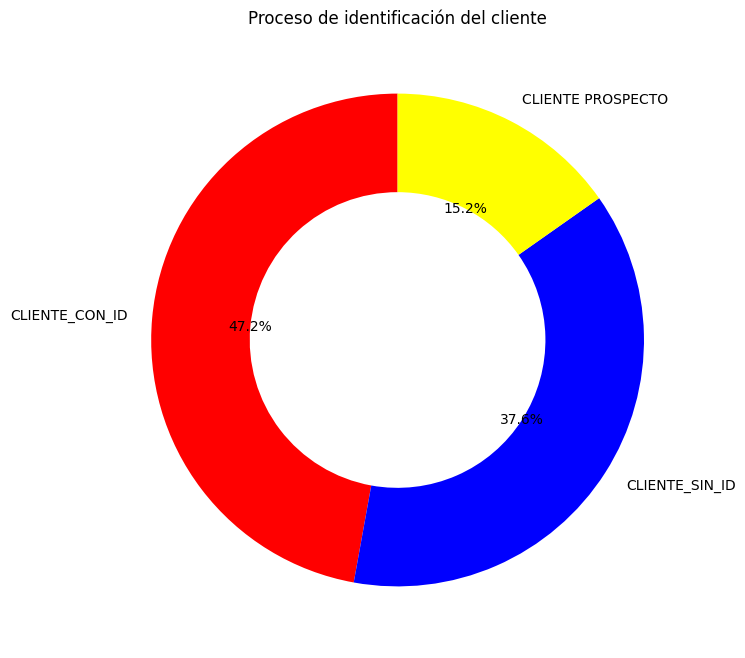

In [100]:
plt.figure(figsize=(8, 8))
plt.pie(desglose_CATEGORIA_CLIENTE_sr, labels=desglose_CATEGORIA_CLIENTE_sr.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=paleta_de_colores)
plt.title('Proceso de identificación del cliente')
plt.show()

# **COLUMNA FECHAS**

## Total unica

In [102]:
total_unica_FECHA = df['FECHA'].nunique()
total_unica_FECHA

363

## Desglose

In [103]:
desglose_FECHA_sr = df['FECHA'].value_counts()
desglose_FECHA_sr

,count
FECHA,
1999-05-23,3064
1999-07-04,2589
1999-08-01,2375
1999-08-02,2363
1999-08-03,2345
...,...
1999-09-25,110
1999-04-06,89
1999-07-24,36


## Cantidad total

In [104]:
total_de_FECHA = df['FECHA'].value_counts().sum()
total_de_FECHA

444448

##*Correccion de columnas con formato de horas

In [105]:
df['FECHA2'] = df['FECHA']
df['FECHA2'] = df['FECHA2'].dt.strftime('%Y-%m-%d')

# **COLUMNAS: HORA ENTRADA LLAMADA VRU Y HORA SALIDA LLAMADA VRU**

##*Correccion de columnas con formato de horas

In [106]:
df['HORA_ENTRADA_LLAMADA_VRU'] = df['HORA_ENTRADA_LLAMADA_VRU'].astype(str)
df['HORA_ENTRADA_LLAMADA_VRU'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_ENTRADA_LLAMADA_VRU'])

df['HORA_SALIDA_LLAMADA_VRU'] = df['HORA_SALIDA_LLAMADA_VRU'].astype(str)
df['HORA_SALIDA_LLAMADA_VRU'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_SALIDA_LLAMADA_VRU'])

# **COLUMNAS: HORA ENTRADA EN ESPERA Y HORA SALIDA EN ESPERA**

##*Correccion de columnas con formato de horas

In [107]:
df['HORA_ENTRADA_EN_ESPERA'] = df['HORA_ENTRADA_EN_ESPERA'].astype(str)
df['HORA_ENTRADA_EN_ESPERA'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_ENTRADA_EN_ESPERA'])

df['HORA_SALIDA_EN_ESPERA'] = df['HORA_SALIDA_EN_ESPERA'].astype(str)
df['HORA_SALIDA_EN_ESPERA'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_SALIDA_EN_ESPERA'])

# **COLUMNAS: HORA ENTRADA EN SERVICIO Y HORA SALIDA EN SERVICIO**

##*Correccion de columnas con formato de horas

In [108]:
df['HORA_ENTRADA_EN_SERVICIO'] = df['HORA_ENTRADA_EN_SERVICIO'].astype(str)
df['HORA_ENTRADA_EN_SERVICIO'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_ENTRADA_EN_SERVICIO'])

df['HORA_SALIDA_EN_SERVICIO'] = df['HORA_SALIDA_EN_SERVICIO'].astype(str)
df['HORA_SALIDA_EN_SERVICIO'] = pd.to_datetime(df['FECHA2'] + ' ' + df['HORA_SALIDA_EN_SERVICIO'])

## Visualizacion de la tabla

In [109]:
df.head(3)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,HORA_SALIDA_EN_ESPERA,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,FECHA2
0,1999-01-01,33116,9664491.0,HANG,2,PS,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1999-01-01
1,1999-01-01,33117,0.0,HANG,0,PS,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AA0101,NO_SERVER,CLIENTE_SIN_ID,1999-01-01
2,1999-01-01,33118,27997683.0,AGENT,2,PS,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,1999-01-01 06:55:43,1999-01-01 06:56:37,54,AA0101,MICHAL,CLIENTE_CON_ID,1999-01-01


## **Eliminacion de columna FECHA 2*

In [110]:
df.drop('FECHA2',axis=1,inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FECHA                       444448 non-null  datetime64[ns]
 1   ID_LLAMADA                  444448 non-null  int64         
 2   ID_CLIENTE                  444411 non-null  float64       
 3   TIPO_DE_LLAMADA             444448 non-null  category      
 4   PRIORIDAD                   444448 non-null  category      
 5   TIPO_DE_SERVICIO            444448 non-null  object        
 6   HORA_ENTRADA_LLAMADA_VRU    444448 non-null  datetime64[ns]
 7   HORA_SALIDA_LLAMADA_VRU     444448 non-null  datetime64[ns]
 8   TIEMPO_DE_ESPERA_TOTAL_VRU  444448 non-null  int64         
 9   HORA_ENTRADA_EN_ESPERA      444448 non-null  datetime64[ns]
 10  HORA_SALIDA_EN_ESPERA       444448 non-null  datetime64[ns]
 11  TIEMPO_TOTAL_EN_ESPERA      444448 non-

# **COLUMNA ID_LLAMADA**

##Total unica

In [112]:
total_unica_ID_LLAMADA = df['ID_LLAMADA'].nunique()
total_unica_ID_LLAMADA

54471

## Desglose

In [113]:
desglose_ID_LLAMADA_sr = df['ID_LLAMADA'].value_counts()
desglose_ID_LLAMADA_sr

,count
ID_LLAMADA,
37585,16
36947,16
36959,16
36958,16
36957,16
...,...
54438,1
54437,1
54436,1


## Cantidad total

In [114]:
total_ID_LLAMADA = desglose_ID_LLAMADA_sr.sum()
total_ID_LLAMADA

444448

# **COLUMNA ID_CLIENTE**

##Total unica

In [115]:
total_unica_ID_CLIENTE = df['ID_LLAMADA'].nunique()
total_unica_ID_CLIENTE

54471

## Desglose

In [116]:
desglose_ID_CLIENTE_sr = df['ID_CLIENTE'].value_counts()
desglose_ID_CLIENTE_sr

,count
ID_CLIENTE,
0.000000e+00,167155
1.000000e+12,67728
5.885975e+07,1996
5.870461e+07,1730
7.191646e+06,1502
...,...
3.312910e+07,1
3.472602e+06,1
2.219066e+07,1


## Cantidad total

In [117]:
total_ID_CLIENTE= df['ID_CLIENTE'].value_counts().sum()
total_ID_CLIENTE

444411

#**COLUMNA TIPO DE LLAMADA**

## Diccionario cambio de nombres de tipo de llamada

In [118]:
dicc_cambio_de_nombres_TIPO_DE_LLAMADA = {'AGENT': 'AGENTE', 'HANG': 'CUELGA', 'PHANTOM': 'FANTASMA'}
dicc_cambio_de_nombres_TIPO_DE_LLAMADA

{'AGENT': 'AGENTE', 'HANG': 'CUELGA', 'PHANTOM': 'FANTASMA'}

## Cambio de nombres de tipo de llamada

In [119]:
df['TIPO_DE_LLAMADA'] = df['TIPO_DE_LLAMADA'].replace(dicc_cambio_de_nombres_TIPO_DE_LLAMADA)

## Cantidad total tipo de llamada

In [120]:
total_tipo_de_llamada = df['TIPO_DE_LLAMADA'].nunique()
total_tipo_de_llamada

3

## Desglose tipo de llamada

In [121]:
desglose_tipo_de_llamada_sr = df['TIPO_DE_LLAMADA'].value_counts()
desglose_tipo_de_llamada_sr

,count
TIPO_DE_LLAMADA,
AGENTE,353143
CUELGA,87706
FANTASMA,3599


## Grafica circular: tipo de llamada (atendida, fantamas o cuelga)

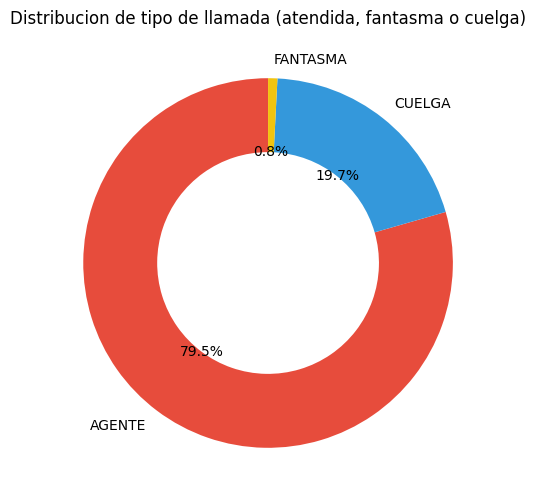

In [124]:
paleta_de_colores = ['#E74C3C', '#3498DB', '#F1C40F']
plt.figure(figsize=(6, 6))
plt.pie(desglose_tipo_de_llamada_sr, labels=desglose_tipo_de_llamada_sr.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=paleta_de_colores)
plt.title('Distribucion de tipo de llamada (atendida, fantasma o cuelga)')
plt.show()

#**COLUMNA PRIORIDAD**

## Cantidad unica total de prioridad

In [125]:
total_unica_PRIORIDAD = df['PRIORIDAD'].nunique()
total_unica_PRIORIDAD

3

## Desglose de prioridad

In [126]:
desglose_PRIORIDAD_sr = df['PRIORIDAD'].value_counts()
desglose_PRIORIDAD_sr

,count
PRIORIDAD,
0,235168
2,137453
1,71827


## Cantidad total de prioridad

In [127]:
total_PRIORIDAD = df['PRIORIDAD'].value_counts().sum()
total_PRIORIDAD

444448

## Grafica: Diagrama de barras de frecuencia de prioridad (0, 1 ó 2)

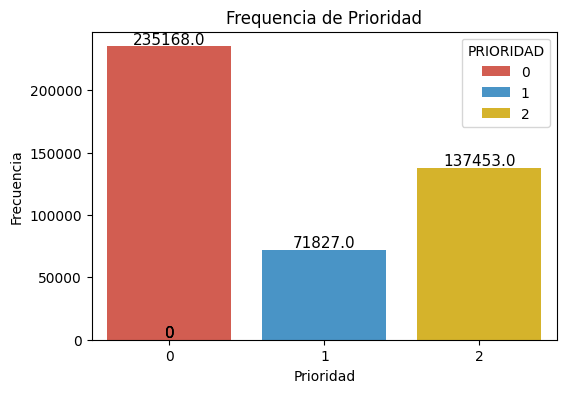

In [128]:
paleta_de_colores = ['#E74C3C', '#3498DB', '#F1C40F']
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='PRIORIDAD', data=df, hue='PRIORIDAD', palette=paleta_de_colores, legend=True)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Frequencia de Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Frecuencia')
plt.show()

# **COLUMNA TIPO DE SERVICIO**

## *Cantidad unica (por corregir)

In [129]:
total_unica_TIPO_DE_SERVICIO = df['TIPO_DE_SERVICIO'].nunique()
total_unica_TIPO_DE_SERVICIO

8

## *Desglose de tipo de servicio (por corregir)

In [130]:
desglose_TIPO_DE_SERVICIO_sr = df['TIPO_DE_SERVICIO'].value_counts()
desglose_TIPO_DE_SERVICIO_sr

,count
TIPO_DE_SERVICIO,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12289
PE,1824
TT,6
AA,5


## *Eliminacion de valores invalidos AA de tipo de servicio

In [131]:
index_AA_para_borrar=df[df['TIPO_DE_SERVICIO'] == 'AA'].index.tolist()
df.drop(index_AA_para_borrar,inplace=True)

## *Correcion de valores ' TT' de tipo de servicio

In [132]:
index_list_TT = df[df['TIPO_DE_SERVICIO'] == ' TT'].index.tolist()
df.loc[index_list_TT,'TIPO_DE_SERVICIO'] = 'TT'

In [133]:
df['TIPO_DE_SERVICIO'] = df['TIPO_DE_SERVICIO'].astype('category')

In [134]:
df['TIPO_DE_SERVICIO'].unique()

['PS', 'NW', 'PE', 'TT', 'IN', 'NE']
Categories (6, object): ['IN', 'NE', 'NW', 'PE', 'PS', 'TT']

## Desglose de tipo de servicio

In [135]:
desglose_tipo_de_servicio_corr = df['TIPO_DE_SERVICIO'].value_counts()
desglose_tipo_de_servicio_corr

,count
TIPO_DE_SERVICIO,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12295
PE,1824


## Cantidad unica

In [136]:
total_TIPO_DE_SERVICIO = df['TIPO_DE_SERVICIO'].nunique()
total_TIPO_DE_SERVICIO

6

In [137]:
dicc_cambio_de_nombres_TIPO_DE_SERVICIO={'PS': 'Actividad Regular', 'NW': 'Cliente potencial', 'NE': 'Actividad por Acciones','IN': 'Consulta por internet', 'TT': 'Cliente espera en cola', 'PE': 'Actividad Regular en ingles'}
dicc_cambio_de_nombres_TIPO_DE_SERVICIO

{'PS': 'Actividad Regular',
 'NW': 'Cliente potencial',
 'NE': 'Actividad por Acciones',
 'IN': 'Consulta por internet',
 'TT': 'Cliente espera en cola',
 'PE': 'Actividad Regular en ingles'}

In [138]:
df['TIPO_DE_SERVICIO'] = df['TIPO_DE_SERVICIO'].replace(dicc_cambio_de_nombres_TIPO_DE_SERVICIO)

### Graficas: Diagrama de barras Tipo de servicio

<ipython-input-139-42269aa5a636>:3: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=desglose_tipo_de_servicio_corr.index, x=desglose_tipo_de_servicio_corr.values, order=orden_descendente_TIPO_DE_SERVICIO, palette=paleta_de_colores, hue=orden_descendente_TIPO_DE_SERVICIO , legend=True)


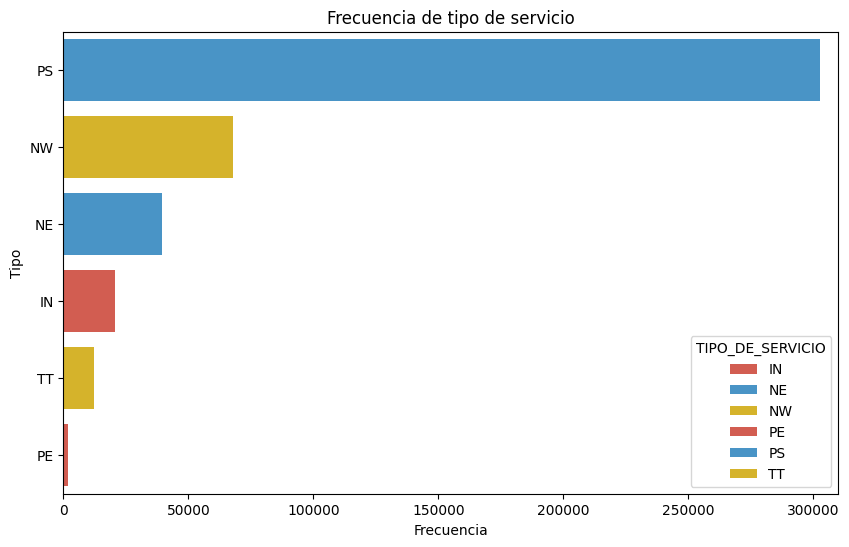

In [139]:
orden_descendente_TIPO_DE_SERVICIO = desglose_tipo_de_servicio_corr.index
plt.figure(figsize=(10, 6))
sns.barplot(y=desglose_tipo_de_servicio_corr.index, x=desglose_tipo_de_servicio_corr.values, order=orden_descendente_TIPO_DE_SERVICIO, palette=paleta_de_colores, hue=orden_descendente_TIPO_DE_SERVICIO , legend=True)
plt.xlim(0, 310000)
plt.title('Frecuencia de tipo de servicio')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo')
plt.show()

# **COLUMNA SERVIDOR**

## Total unica

In [140]:
total_SERVIDOR = df['SERVIDOR'].nunique()
total_SERVIDOR

53

## Desglose

In [141]:
desglose_SERVIDOR_sr = df['SERVIDOR'].value_counts()

# **NUEVA COLUMNA: MES**

##*Creacion de nueva columna dia y mes para extraccion de datos de fechas

In [142]:
# Se agrega una nueva columna para el mes
df['MES'] = df['FECHA'].dt.month
df['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

# **NUEVA COLUMNA: DIA**

In [143]:
# Se agrega una nueva columna para el dia
df['DIA'] = df['FECHA'].dt.day
df['DIA'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 11, 12],
      dtype=int32)

In [144]:
total_unica_MES = df['MES'].nunique()
total_unica_MES

12

#**CALCULOS LLAMADAS POR MES**

### Desglose llamadas por mes

In [145]:
desglose_LLAMADAS_por_mes_sr = df.groupby('MES').size()
desglose_LLAMADAS_por_mes_sr

,0
MES,
1,31597
2,33344
3,38801
4,32035
5,39553
6,37935
7,39021
8,42078
9,31370


### Promedio llamadas por mes


In [146]:
promedio_LLAMADAS_por_mes = df['MES'].value_counts().mean()
promedio_LLAMADAS_por_mes

37036.916666666664

### Maximo



In [147]:
maximo_LLAMADAS_por_mes = df['MES'].value_counts().max()
maximo_LLAMADAS_por_mes

43065

### Minimo

In [148]:
minimo_LLAMADAS_por_mes=df['MES'].value_counts().min()
minimo_LLAMADAS_por_mes

31370

###Amplitud


In [149]:
amplitud_LLAMADAS_por_mes= maximo_LLAMADAS_por_mes-minimo_LLAMADAS_por_mes
amplitud_LLAMADAS_por_mes

11695

###Top 4 Minimos

In [150]:
top4_LLAMADAS_valores_minimos_sr = df['MES'].value_counts().nsmallest(4)
top4_LLAMADAS_valores_minimos_sr

,count
MES,
9,31370
1,31597
4,32035
2,33344


###Top 4 Maximos

In [151]:
top4_LLAMADAS_valores_maximos_sr = df['MES'].value_counts().nlargest(4)
top4_LLAMADAS_valores_maximos_sr

,count
MES,
12,43065
8,42078
11,41019
5,39553


### Tabla: Desglose llamadas totales por mes y prioridad

In [152]:
desglose_LLAMADAS_por_mes_y_PRIORIDAD_df = df.groupby(['MES', 'PRIORIDAD'],observed=True).size().unstack().fillna(0)
desglose_LLAMADAS_por_mes_y_PRIORIDAD_df

PRIORIDAD,0,1,2
MES,,,
1,18222,4530,8845
2,19602,4623,9119
3,15490,7844,15467
4,13879,6274,11882
5,17917,7164,14472
6,20076,5666,12193
7,17220,7583,14218
8,23112,6573,12393
9,21085,3626,6659


###Graficas: Diagrama de barras Volumen de llamadas por mes

<ipython-input-153-9d1c63737579>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='MES', palette=custom_palette)


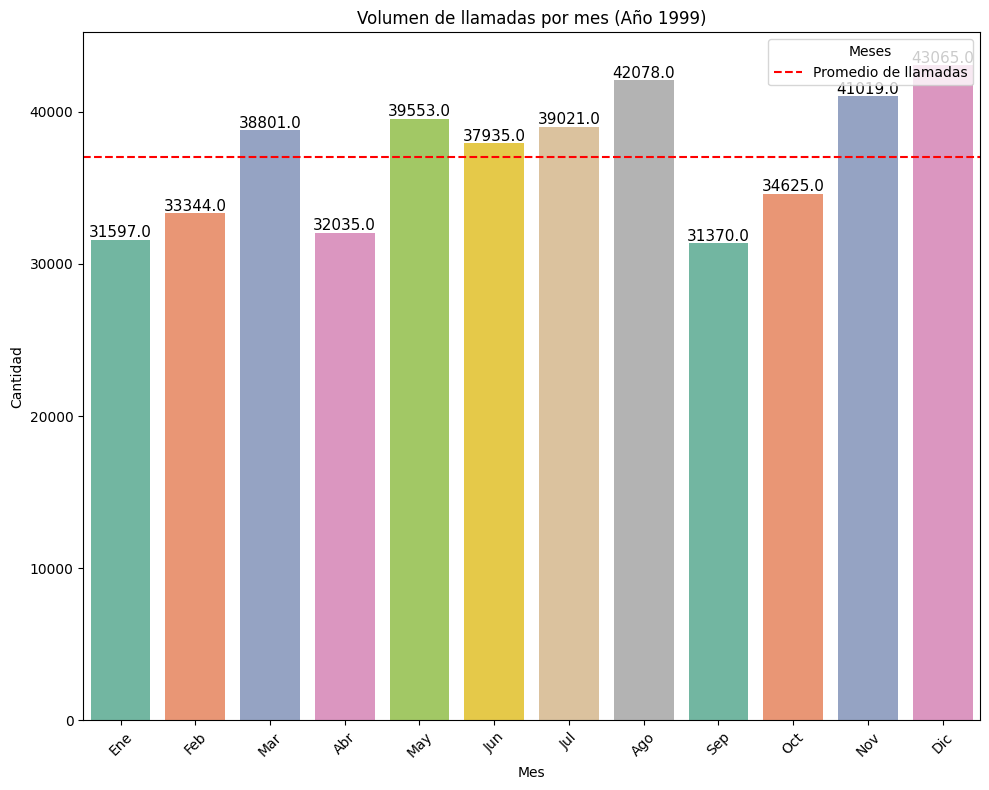

In [153]:
plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette("Set2", len(df['MES'].unique()))
ax = sns.countplot(data=df, x='MES', palette=custom_palette)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(12), labels=meses, rotation=45)
plt.axhline(y=promedio_LLAMADAS_por_mes, color='red', linestyle='--', label='Promedio de llamadas')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas por mes (Año 1999)')
plt.legend(title='Meses', loc='upper right')
plt.tight_layout()
plt.show()

# **CALCULOS LLAMADAS POR DIA**

### LUNES A DOMINGO

####Desglose llamadas por dia (lunes a domingo)

In [154]:
desglose_FECHA_lun_a_dom_sr = df.groupby(df['FECHA'].dt.date).size()
desglose_FECHA_lun_a_dom_sr

,0
FECHA,
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-04,1834
1999-01-05,1629
...,...
1999-12-27,1883
1999-12-28,1768
1999-12-29,1820


#### Estadisticas descriptivas (lunes a domingo)

In [155]:
descripcion_FECHA_lun_a_dom_sr =desglose_FECHA_lun_a_dom_sr.describe()
descripcion_FECHA_lun_a_dom_sr

,0
count,363.000000
mean,1224.360882
std,642.844356
min,14.000000
25%,546.000000
50%,1443.000000
75%,1713.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (lunes a domingo)

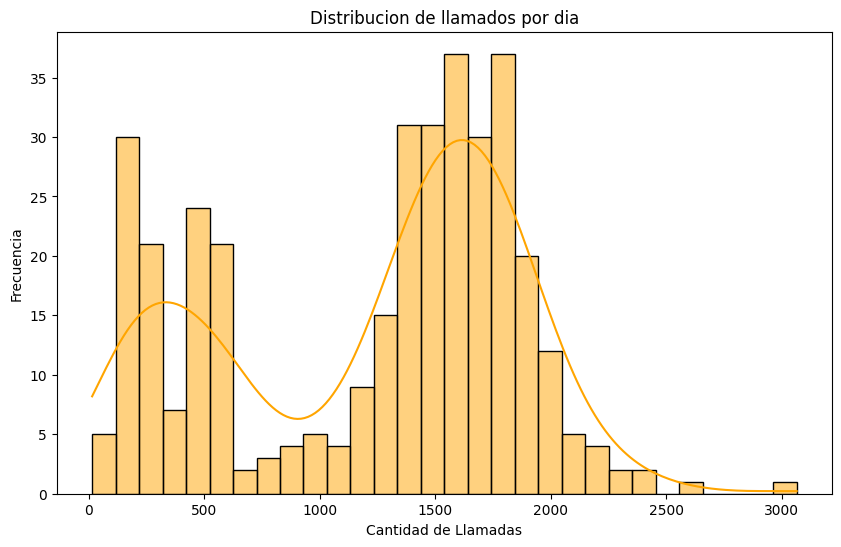

In [156]:
plt.figure(figsize=(10, 6))
ax= sns.histplot(desglose_FECHA_lun_a_dom_sr, bins=30, kde=True, color='orange')
plt.title('Distribucion de llamados por dia')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

### LUNES A JUEVES

####Tabla de fechas (lunes a jueves)

In [157]:
tabla_FECHA_lun_a_jue_df = df[df['FECHA'].dt.dayofweek >= 4]
tabla_FECHA_lun_a_jue_df.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,HORA_SALIDA_EN_ESPERA,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1
1,1999-01-01,33117,0.0,CUELGA,0,Actividad Regular,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_SIN_ID,1,1


#### Desglose de fechas (lunes a jueves)

In [158]:
desglose_FECHA_lun_a_jue_sr = tabla_FECHA_lun_a_jue_df.groupby(tabla_FECHA_lun_a_jue_df['FECHA'].dt.date).size()
desglose_FECHA_lun_a_jue_sr

,0
FECHA,
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-08,439
1999-01-09,201
...,...
1999-12-19,1601
1999-12-24,487
1999-12-25,221


#### Estadisticas descriptivas (lunes a jueves)

In [159]:
descripcion_FECHA_lun_a_jue_sr = desglose_FECHA_lun_a_jue_sr.describe()
descripcion_FECHA_lun_a_jue_sr

,0
count,157.000000
mean,803.777070
std,683.834275
min,14.000000
25%,233.000000
50%,509.000000
75%,1519.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (lunes a jueves)

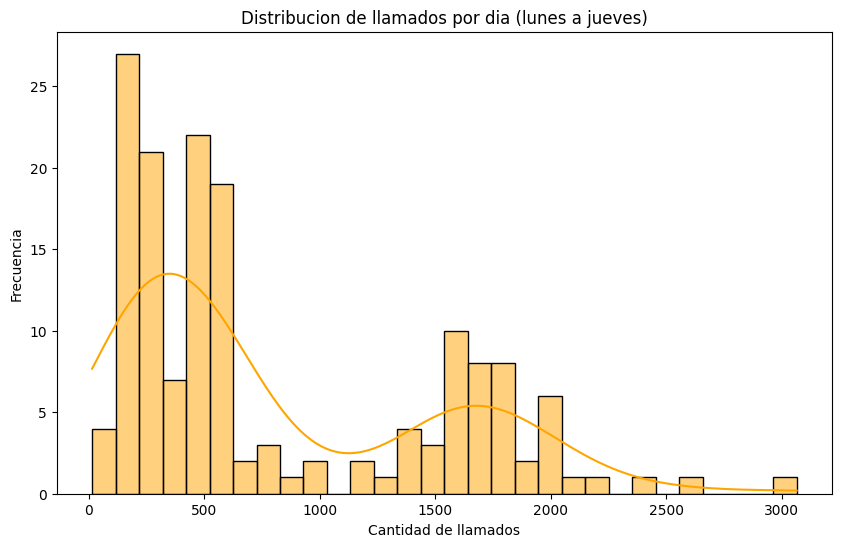

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(desglose_FECHA_lun_a_jue_sr, bins=30, kde=True, color='orange')
plt.title('Distribucion de llamados por dia (lunes a jueves)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

### VIERNES A DOMINGO

####Tabla de fechas (viernes a domingo)

In [161]:
tabla_FECHA_vie_a_dom_df = df[df['FECHA'].dt.dayofweek >= 4]
tabla_FECHA_vie_a_dom_df.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,HORA_SALIDA_EN_ESPERA,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1
1,1999-01-01,33117,0.0,CUELGA,0,Actividad Regular,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_SIN_ID,1,1


#### Desglose de fechas (viernes a domingo)

In [162]:
desglose_FECHA_vie_a_dom_sr = tabla_FECHA_vie_a_dom_df.groupby(tabla_FECHA_vie_a_dom_df['FECHA'].dt.date).size()
desglose_FECHA_vie_a_dom_sr

,0
FECHA,
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-08,439
1999-01-09,201
...,...
1999-12-19,1601
1999-12-24,487
1999-12-25,221


#### Estadisticas descriptivas (viernes a domingo)

In [163]:
descripcion_FECHA_vie_a_dom_sr = desglose_FECHA_vie_a_dom_sr.describe()
descripcion_FECHA_vie_a_dom_sr

,0
count,157.000000
mean,803.777070
std,683.834275
min,14.000000
25%,233.000000
50%,509.000000
75%,1519.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (viernes a domingo)

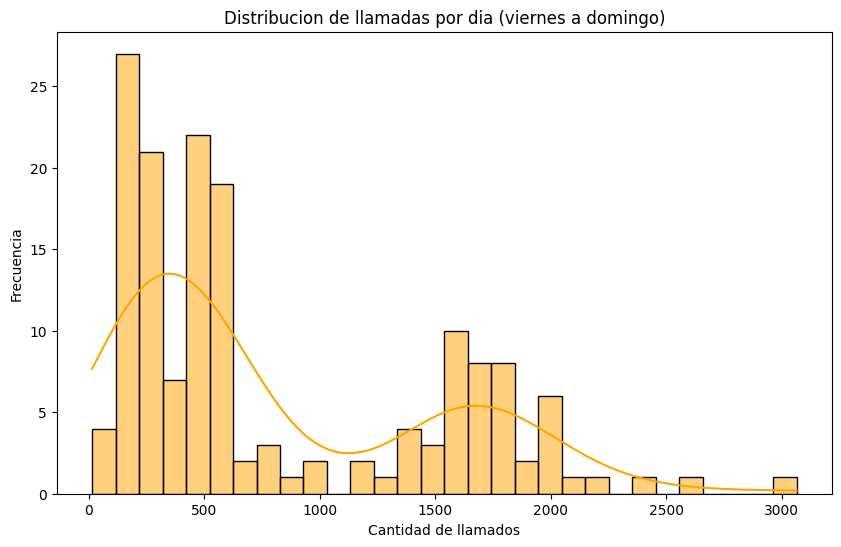

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(desglose_FECHA_vie_a_dom_sr, bins=30, kde=True, color='orange')
plt.title('Distribucion de llamadas por dia (viernes a domingo)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

##LLAMADAS POR HORA POR DIA (LUNES A JUEVES)

####*Extraccion de Tabla de fechas (lunes a jueves)

In [165]:
# Filtramos de Lunes a Jueves nuevamente
tabla_HORA_lun_a_jue_df = df[(df['FECHA'].dt.dayofweek >= 0) & (df['FECHA'].dt.dayofweek <= 3)].copy()

####Tabla de horas (lunes a jueves)

In [166]:
# Extraemos la hora de 'hora_entrada_llamada'
tabla_HORA_lun_a_jue_df['HORA'] = tabla_HORA_lun_a_jue_df['HORA_ENTRADA_LLAMADA_VRU'].dt.hour

####Desglose llamadas por hora (lunes a jueves)

In [167]:
desglose_llamadas_por_hora_lune_a_jue_sr = tabla_HORA_lun_a_jue_df.groupby('HORA').size()
desglose_llamadas_por_hora_lune_a_jue_sr

,0
HORA,
0,1060
1,378
2,201
3,99
4,107
5,256
6,1232
7,8386
8,17875


In [168]:
tabla_HORA_lun_a_jue_df['HORA'] = tabla_HORA_lun_a_jue_df['HORA_ENTRADA_LLAMADA_VRU'].dt.hour

#### Graficas: Histograma Distribucion llamadas por hora (lunes a jueves)

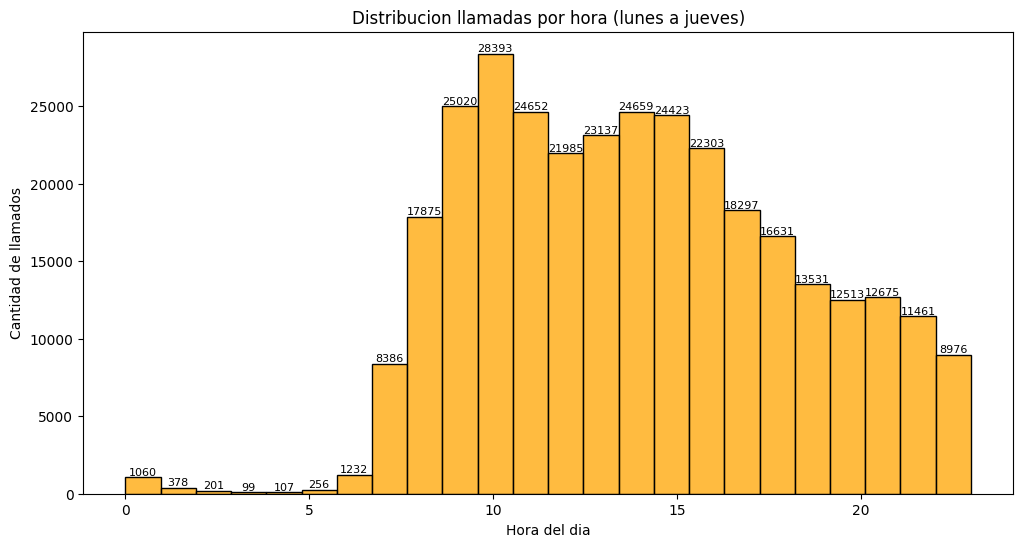

In [169]:
plt.figure(figsize=(12, 6))
ax= sns.histplot(tabla_HORA_lun_a_jue_df['HORA'], bins=24, kde=False, color='orange')
plt.title('Distribucion llamadas por hora (lunes a jueves)')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de llamados')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)

plt.show()

####Estadisticas descriptivas de llamadas por hora (lunes a jueves)

In [170]:
descripicion_llamadas_por_hora_lune_a_jue_sr = desglose_llamadas_por_hora_lune_a_jue_sr.describe()
descripicion_llamadas_por_hora_lune_a_jue_sr

,0
count,24.000000
mean,13260.416667
std,9905.542366
min,99.000000
25%,1189.000000
50%,13103.000000
75%,22511.500000
max,28393.000000


####Tabla dinamica llamadas por hora (lunes a jueves)

In [171]:
tabla_dinamica_llamadas_por_hora_lune_a_jue_df = tabla_HORA_lun_a_jue_df.pivot_table(index='HORA', columns=tabla_HORA_lun_a_jue_df['FECHA'].dt.dayofweek, aggfunc='size')
nombres_dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves']
tabla_dinamica_llamadas_por_hora_lune_a_jue_df.columns = nombres_dias
tabla_dinamica_llamadas_por_hora_lune_a_jue_df

,Lunes,Martes,Miercoles,Jueves
HORA,,,,
0,267,267,253,273
1,112,87,102,77
2,49,55,46,51
3,28,19,34,18
4,23,24,34,26
5,78,68,54,56
6,364,285,306,277
7,2466,1987,1951,1982
8,4547,4511,4434,4383


#### Graficas: Mapa de calor llamadas por hora por dia (lunes a jueves)

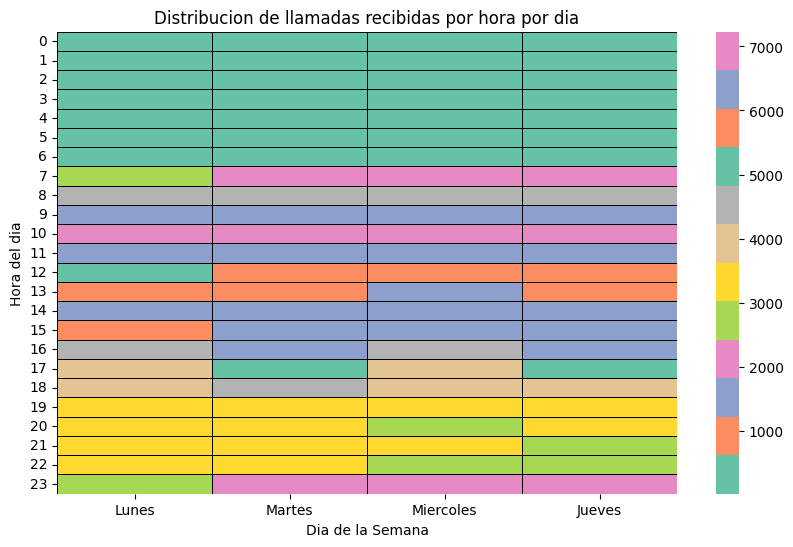

In [172]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_dinamica_llamadas_por_hora_lune_a_jue_df, cmap=custom_palette, linewidths=0.5, linecolor='black')
plt.title('Distribucion de llamadas recibidas por hora por dia')
plt.xlabel('Dia de la Semana')
plt.ylabel('Hora del dia')
plt.yticks(rotation=0)
plt.show()

####Conclusiones de llamadas por hora por dia (lunes a jueves)

*   Podemos ver que para todos los dias de Lunes a Jueves, los picos de demanda se repiten en los horarios de 10hs a 15 hs. para todos los dias de manera consistente.<br>
*   Podemos afirmar que estos son los picos de demanda, y que luego de las 15hs se mantiene elevada la actividad del call center<br>
*   Ademas podemos decir, que en las franjas iniciales de actividad de 7 am a 10am, y luego en la franja posterior al pico de las 15hs, de 17 a 22hs el nivel de actividad es bastante constante.


#### Promedio llamadas promedio por hora por dia

In [173]:
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue = tabla_HORA_lun_a_jue_df.groupby(['FECHA', 'HORA']).size().groupby('HORA').mean()
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue

,0
HORA,
0,5.520833
1,2.454545
2,1.827273
3,1.523077
4,1.573529
5,1.984496
6,6.285714
7,41.721393
8,88.490099


####Estadisticas descriptivas

In [174]:
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.describe()

,0
count,24.000000
mean,65.879657
std,48.837626
min,1.523077
25%,6.094494
50%,64.546798
75%,111.855050
max,141.258706


####Promedio del promedio

In [175]:
promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue= promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.mean()
promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue

65.87965719425937

Graficas: Diagrama de barras promedio llamadas por hora por dia (lunes a jueves)

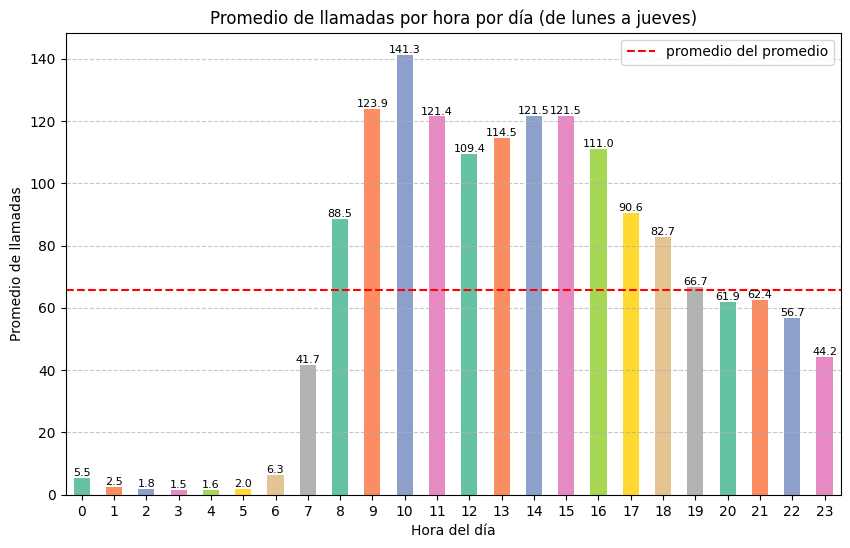

In [176]:
plt.figure(figsize=(10, 6))
ax=promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.plot(kind='bar', color=custom_palette)
plt.title('Promedio de llamadas por hora por día (de lunes a jueves)')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de llamadas')
plt.axhline(y=promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue, color='red', linestyle='--', label='promedio del promedio')
plt.legend()
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####Conclusiones de promedio de llamadas por hora por dia (lunes a jueves)

Se ve claramente que los picos se repiten para todos los dias, de lunes a jueves;
* El **maximo** de llamadas por hora que se ha registrado es de **141 llamadas en la misma hora**
* El **minimo** de llamadas recibidas en una hora es de **2 llamadas**
* El **promedio de llamadas por hora es de 65 llamadas**.
* El **75%** de las veces se reciben menos de **111 llamadas por hora**

# **COLUMNA TIEMPO DE ESPERA**

####*Estadisticas descriptivas con error

In [177]:
descripcion_TIEMPO_DE_ESPERA_lun_a_jue = df['TIEMPO_DE_ESPERA_TOTAL_VRU'].describe()
descripcion_TIEMPO_DE_ESPERA_lun_a_jue

,TIEMPO_DE_ESPERA_TOTAL_VRU
count,444443.000000
mean,10.285917
std,34.942273
min,-362.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,4832.000000


####*Conteo y porcentaje de valores negativos

In [178]:
total_tiempo_espera_negativos = (df['TIEMPO_DE_ESPERA_TOTAL_VRU'] < 0).sum()
total_tiempo_espera_negativos

350

In [179]:
porcentaje_tiempo_espera_negativos = round(total_tiempo_espera_negativos/df['TIEMPO_DE_ESPERA_TOTAL_VRU'].count()*100, 2)
porcentaje_tiempo_espera_negativos

0.08

##*Correccion de columna hora de entrada de llamada

In [180]:
df['HORA_ENTRADA_LLAMADA_VRU_CORR'] = np.where(df['HORA_ENTRADA_LLAMADA_VRU'] > df['HORA_ENTRADA_LLAMADA_VRU'], df['HORA_SALIDA_LLAMADA_VRU'], df['HORA_ENTRADA_LLAMADA_VRU'])

In [181]:
df['HORA_SALIDA_LLAMADA_VRU'] = np.where(df['HORA_ENTRADA_LLAMADA_VRU'] > df['HORA_SALIDA_LLAMADA_VRU'], df['HORA_ENTRADA_LLAMADA_VRU'], df['HORA_SALIDA_LLAMADA_VRU'])

In [182]:
df['TIEMPO_DE_ESPERA_TOTAL_VRU_CORR'] = (df['HORA_SALIDA_LLAMADA_VRU'] - df['HORA_ENTRADA_LLAMADA_VRU_CORR']).dt.total_seconds()

In [183]:
df['TIEMPO_DE_ESPERA_TOTAL_VRU_CORR'] = df['TIEMPO_DE_ESPERA_TOTAL_VRU_CORR'].astype('int64')

##Estadisticas descriptivas corregidas

In [184]:
descripcion_TIEMPO_DE_ESPERA_lun_a_jue = df['HORA_ENTRADA_LLAMADA_VRU_CORR'].describe()
descripcion_TIEMPO_DE_ESPERA_lun_a_jue

,HORA_ENTRADA_LLAMADA_VRU_CORR
count,444443
mean,1999-07-07 00:23:34.084071296
min,1999-01-01 00:00:02
25%,1999-04-11 09:01:07.500000
50%,1999-07-06 15:54:09
75%,1999-10-07 09:53:54
max,1999-12-31 22:23:35


##*Eliminacion de valores

In [185]:
df['TIEMPO_DE_ESPERA_TOTAL_VRU'] = df['TIEMPO_DE_ESPERA_TOTAL_VRU_CORR']
df.drop('TIEMPO_DE_ESPERA_TOTAL_VRU_CORR',axis=1,inplace=True)

##Graficas: Diagrama de caja tiempos de espera

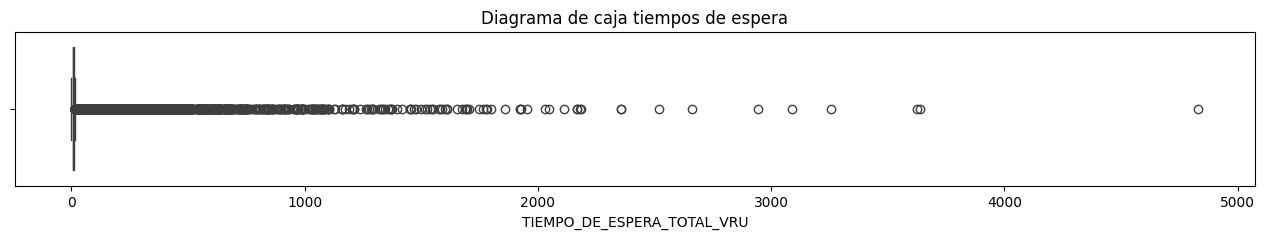

In [186]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['TIEMPO_DE_ESPERA_TOTAL_VRU'])
plt.title('Diagrama de caja tiempos de espera')
plt.xlabel('TIEMPO_DE_ESPERA_TOTAL_VRU')
plt.show()

##Graficas: Diagrama de franjas

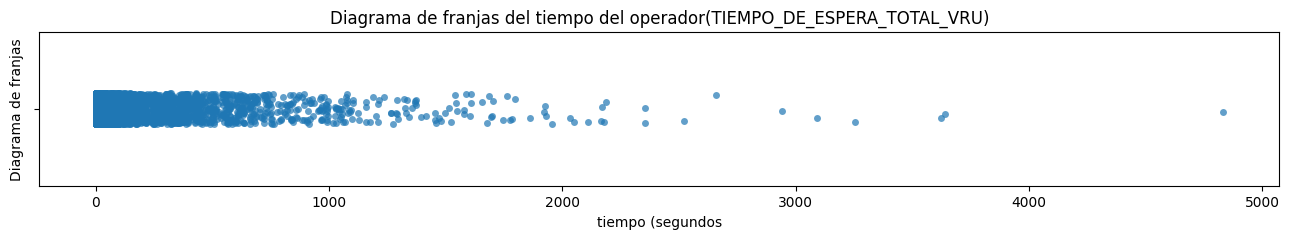

In [187]:
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='TIEMPO_DE_ESPERA_TOTAL_VRU', jitter=True, alpha=0.7)
plt.xlabel('tiempo (segundos')
plt.ylabel('Diagrama de franjas')
plt.title('Diagrama de franjas del tiempo del operador(TIEMPO_DE_ESPERA_TOTAL_VRU)')
plt.show()

##*Outliers de tiempos de espera conteo y porcentaje

In [188]:
outlier_conteo_mayor_16seg = (df['TIEMPO_DE_ESPERA_TOTAL_VRU'] > 16).sum()
outlier_porcentaje_mayor_16seg = round(outlier_conteo_mayor_16seg  /df['TIEMPO_DE_ESPERA_TOTAL_VRU'].count()*100,2)
outlier_conteo_mayor_1000seg = (df['TIEMPO_DE_ESPERA_TOTAL_VRU'] > 1000).sum()
outlier_porcentaje_mayor_1000seg  = round(outlier_conteo_mayor_1000seg/df['TIEMPO_DE_ESPERA_TOTAL_VRU'].count()*100,2)

##*Eliminacion de ouliers

In [189]:
df = df[df['TIEMPO_DE_ESPERA_TOTAL_VRU'] <=1000]
(df['TIEMPO_DE_ESPERA_TOTAL_VRU'] > 1000).sum()

0

## Estadisticas descriptivas corregidas

In [190]:
descripcion_tiempos_espera_lun_a_jue = df['TIEMPO_DE_ESPERA_TOTAL_VRU'].describe()
descripcion_tiempos_espera_lun_a_jue

,TIEMPO_DE_ESPERA_TOTAL_VRU
count,444333.000000
mean,9.958736
std,22.927519
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,997.000000


## Conclusiones de tiempo de espera

Los tiempos entre que una llamada es recepcionada y asignada al VRU correspondiente tiene una duracion promedio de 10 segundos.

El valor maximo es de unos 4832 segundos (80 minutos).

El valor minimo es 0 segundos

El 75% de las llamadas son enviadas a cola en menos de 10 segundos. Esto es 333.250 llamados.

Analizando las graficas de los Boxplots y la dispersion y los calculos de los outliers vemos que:

hay 26.333 llamadas con tiempos mayores a los 16 segundos, representando alrededor del 6% de todos los registros. Estos registros podrian ser considerados atipicos o desvios.
Tiempos entre los 16 segundos y hasta 1000 segundos (aproximadamente 16 minutos), se considerarian normales.
De esta forma, podriamos clasificar como outliers solamente 110 llamadas, que representan el 0.02% del total de los llamados recibidos.
procedemos a eliminar estos registros.

## Desglose tiempo de espera (lunes a jueves)

In [191]:
desglose_tiempo_de_espera_lun_a_jue_sr = df['TIEMPO_DE_ESPERA_TOTAL_VRU'].value_counts().sort_index()
desglose_tiempo_de_espera_lun_a_jue_sr

,count
TIEMPO_DE_ESPERA_TOTAL_VRU,
0,9046
1,1708
2,6568
3,1797
4,1934
...,...
990,3
991,1
995,1


In [192]:
tabla_llamadas_validas = df[df['TIEMPO_DE_ESPERA_TOTAL_VRU'] > 0]
tabla_llamadas_validas.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,...,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA,HORA_ENTRADA_LLAMADA_VRU_CORR
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,...,153,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1,1999-01-01 00:00:31
1,1999-01-01,33117,0.0,CUELGA,0,Actividad Regular,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,...,0,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_SIN_ID,1,1,1999-01-01 00:34:12


## Graficas: Histograma distribucion tiempos de espera

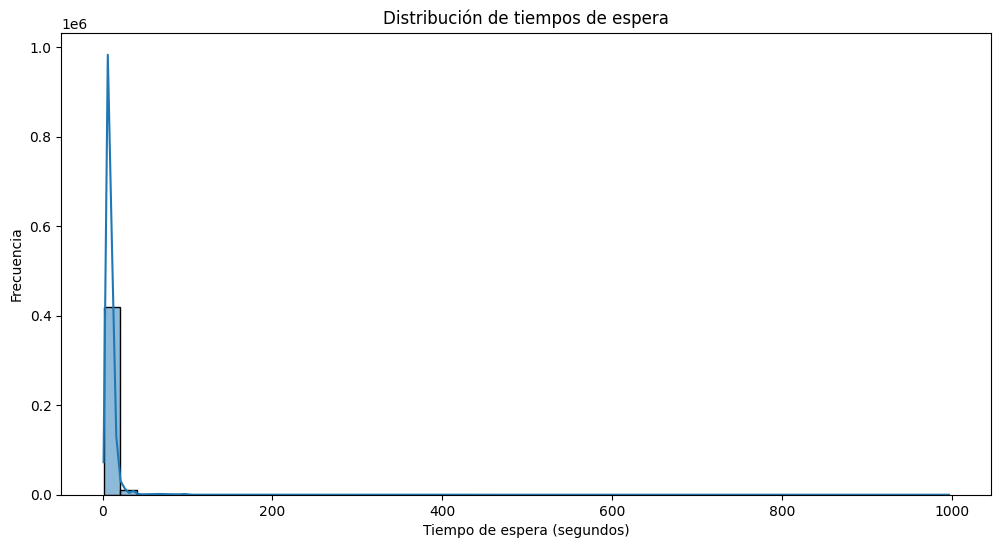

In [193]:
plt.figure(figsize=(12, 6))
sns.histplot(tabla_llamadas_validas['TIEMPO_DE_ESPERA_TOTAL_VRU'], bins=50, kde=True)
plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')
plt.show()

# **COLUMNA: HORA DE ENTRADA EN ESPERA Y HORA DE SALIDA EN ESPERA**

In [194]:
df.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,...,TIEMPO_TOTAL_EN_ESPERA,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA,HORA_ENTRADA_LLAMADA_VRU_CORR
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,...,153,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1,1999-01-01 00:00:31
1,1999-01-01,33117,0.0,CUELGA,0,Actividad Regular,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,...,0,1999-01-01,1999-01-01,0,AA0101,NO_SERVER,CLIENTE_SIN_ID,1,1,1999-01-01 00:34:12


In [195]:
tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_ESPERA'] = tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_ESPERA'].dt.hour
tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_ESPERA'] = tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_ESPERA'].dt.hour

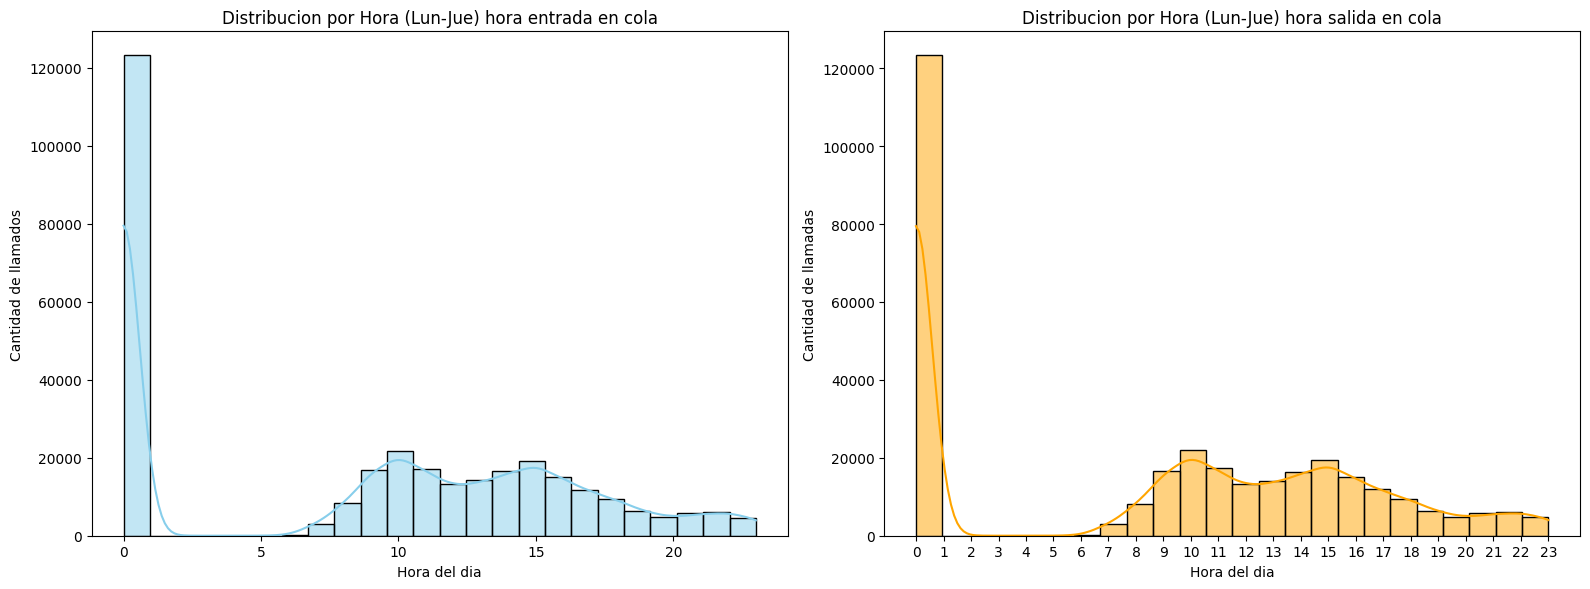

In [196]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_ESPERA'], bins=24, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) hora entrada en cola')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

plt.xticks(ticks=range(24), labels=range(24))
plt.tight_layout()


sns.histplot(tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_ESPERA'], bins=24, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) hora salida en cola')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamadas')

plt.xticks(ticks=range(24), labels=range(24))
plt.tight_layout()


plt.tight_layout()
plt.show()

## TASA DE ABANDONO

## Tabla con clientes que abandonan en espera

In [197]:
tabla_abandonan_en_espera = df[df['HORA_ENTRADA_EN_ESPERA'].dt.time == pd.to_datetime('00:00:00').time()]

## Cantidad total de clientes que abandonan en espera

In [198]:
total_abandonan_en_espera = tabla_abandonan_en_espera ['ID_LLAMADA'].count()
total_abandonan_en_espera

180734

##Porcentaje total de clientes que abandonan en cola

In [199]:
porcentaje_abandonan_en_espera= round(((total_abandonan_en_espera)/(total_ID_CLIENTE)*100),0)
porcentaje_abandonan_en_espera

41.0

## Tasa de abandono real

### Tabla con clientes que hora entrada cero y hora de servicio cero

In [200]:
tabla_abandonan_real_en_espera = df[(df['HORA_ENTRADA_EN_ESPERA'].dt.time == pd.to_datetime('00:00:00').time()) & (df['HORA_ENTRADA_EN_SERVICIO'].dt.time == pd.to_datetime('00:00:00').time())]

###Cantidad total de clientes que hora entrada cero y hora de servcio cero

In [201]:
total_abandonan_real_en_espera = tabla_abandonan_real_en_espera['ID_LLAMADA'].count()
total_abandonan_real_en_espera

23828

###Porcentaje de clientes que hora entrada cero y hora de servcio cero

In [202]:
porcentaje_abandonan_real_en_espera = round((total_abandonan_real_en_espera / total_ID_CLIENTE) * 100, 0)
porcentaje_abandonan_real_en_espera

5.0

###Cantidad total de clientes que abandonan en servicio

In [203]:
tabla_abandonan_en_servicio = df[(df['HORA_ENTRADA_EN_ESPERA'].dt.time != pd.to_datetime('00:00:00').time()) & (df['HORA_ENTRADA_EN_SERVICIO'].dt.time == pd.to_datetime('00:00:00').time())]

In [204]:
total_abandonan_en_servicio = tabla_abandonan_en_servicio['ID_LLAMADA'].count()
total_abandonan_en_servicio

63210

###Porcentaje total de clientes que abandonan en servicio

In [205]:
porcentaje_abandonan_en_servicio  = round(((total_abandonan_en_servicio)/(total_ID_CLIENTE)*100),0)
porcentaje_abandonan_en_servicio

14.0

###Cantidad total de clientes que no abandonan

In [206]:
tabla_no_abandonan = df[(df['HORA_ENTRADA_EN_ESPERA'].dt.time != pd.to_datetime('00:00:00').time()) & (df['HORA_ENTRADA_EN_SERVICIO'].dt.time != pd.to_datetime('00:00:00').time())]

In [207]:
total_no_abandonan =tabla_no_abandonan['ID_LLAMADA'].count()
total_no_abandonan

200389

In [208]:
porcentaje_no_abandonan = round(((total_no_abandonan)/(total_ID_CLIENTE)*100),0)
porcentaje_no_abandonan

45.0

# **NUEVA COLUMNA: CATEGORIA DE ABANDONO**

In [209]:
df['CATEGORIA_DE_ABANDONO'] = df['CATEGORIA_CLIENTE']
df['CATEGORIA_DE_ABANDONO'] = df['CATEGORIA_DE_ABANDONO'].astype(str)

##Creacion de subcategorias

###Abandonado en espera

In [210]:
df.loc[(df['HORA_ENTRADA_EN_ESPERA'].dt.time == pd.to_datetime('00:00:00').time()) & (df['HORA_ENTRADA_EN_SERVICIO'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_DE_ABANDONO'] = 'ABANDONADO_EN_ESPERA'

### Abandonado en servicio

In [211]:
df.loc[(df['HORA_ENTRADA_EN_ESPERA'].dt.time != pd.to_datetime('00:00:00').time()) & (df['HORA_ENTRADA_EN_SERVICIO'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_DE_ABANDONO'] = 'ABANDONADO_EN_SERVICIO'

### No abandonado

In [212]:
df.loc[(df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA') & (df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_SERVICIO'), 'CATEGORIA_DE_ABANDONO'] = 'NO_ABANDONADO'

##Porcentaje de Abandonado en espera

In [213]:
porcentaje_ABANDONADO_EN_ESPERA = round((df[df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_ESPERA'].shape[0] / len(df)) * 100,0)
porcentaje_ABANDONADO_EN_ESPERA

5.0

##Porcentaje de Abandonado en servicio

In [214]:
porcentaje_ABANDONADO_EN_SERVICIO = round((df[df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_SERVICIO'].shape[0] / len(df)) * 100,0)

##Porcentaje de No Abandonado

In [215]:
porcentaje_NO_ABANDONADO = round((df[df['CATEGORIA_DE_ABANDONO'] == 'NO_ABANDONADO'].shape[0] / len(df)) * 100,0)

## Total unico de subcategorias de abandono

In [216]:
total_unico_CATEGORIA_DE_ABANDONO = df['CATEGORIA_DE_ABANDONO'].nunique()
total_unico_CATEGORIA_DE_ABANDONO

3

##Desglose de subcategorias de abandono

In [217]:
desglose_CATEGORIA_DE_ABANDONO = df['CATEGORIA_DE_ABANDONO'].value_counts()
desglose_CATEGORIA_DE_ABANDONO

,count
CATEGORIA_DE_ABANDONO,
NO_ABANDONADO,357295
ABANDONADO_EN_SERVICIO,63210
ABANDONADO_EN_ESPERA,23828


##Total de subcategorias de abandono

In [218]:
total_CATEGORIA_DE_ABANDONO = desglose_CATEGORIA_DE_ABANDONO.sum()
total_CATEGORIA_DE_ABANDONO

444333

##Graficas: Grafico circular de subcategorias de abandono

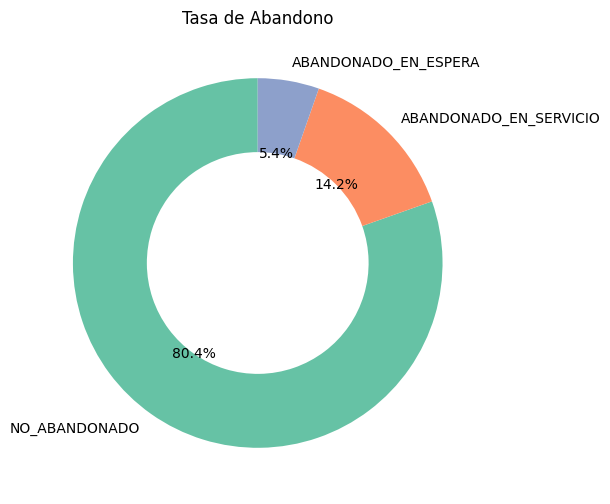

In [219]:
plt.figure(figsize=(6, 6))
plt.pie(desglose_CATEGORIA_DE_ABANDONO, labels=desglose_CATEGORIA_DE_ABANDONO.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_palette)
plt.title('Tasa de Abandono')
plt.show()

## Tabla filtrada con clientes que abandonan

In [220]:
tabla_clientes_que_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_ESPERA') | (df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_SERVICIO')]

## Cantidad total de clientes que abandonan

In [221]:
total_clientes_que_abandonan= tabla_clientes_que_abandonan['ID_CLIENTE'].count()
total_clientes_que_abandonan

87029

##Desglose de cantidades por subcategorias de abandono

In [222]:
desglose_cantidades_por_CATEGORIA_DE_ABANDONO = tabla_clientes_que_abandonan['CATEGORIA_DE_ABANDONO'].value_counts()
desglose_cantidades_por_CATEGORIA_DE_ABANDONO

,count
CATEGORIA_DE_ABANDONO,
ABANDONADO_EN_SERVICIO,63210
ABANDONADO_EN_ESPERA,23828


##Promedio tiempo de espera desglosado en subcategorias de abandono

In [223]:
desglose_promedio_TIEMPO_DE_ESPERA = tabla_clientes_que_abandonan.groupby('CATEGORIA_CLIENTE')['TIEMPO_TOTAL_EN_ESPERA'].mean()
desglose_promedio_TIEMPO_DE_ESPERA

,TIEMPO_TOTAL_EN_ESPERA
CATEGORIA_CLIENTE,
CLIENTE PROSPECTO,69.919891
CLIENTE_CON_ID,68.045140
CLIENTE_SIN_ID,28.039019


In [224]:
total_promedio_TIEMPO_DE_ESPERA  = desglose_cantidades_por_CATEGORIA_DE_ABANDONO.sum()
total_promedio_TIEMPO_DE_ESPERA

87038

In [225]:
desglose_porcentaje_promedio_TIEMPO_DE_ESPERA = round((desglose_cantidades_por_CATEGORIA_DE_ABANDONO/ total_ID_CLIENTE) * 100,0)
desglose_porcentaje_promedio_TIEMPO_DE_ESPERA

,count
CATEGORIA_DE_ABANDONO,
ABANDONADO_EN_SERVICIO,14.0
ABANDONADO_EN_ESPERA,5.0


In [226]:
tabla_cantidad_y_porcentaje_TIEMPO_DE_ESPERA = pd.DataFrame({'Count': desglose_cantidades_por_CATEGORIA_DE_ABANDONO, 'Percentage': desglose_porcentaje_promedio_TIEMPO_DE_ESPERA })
tabla_cantidad_y_porcentaje_TIEMPO_DE_ESPERA

,Count,Percentage
CATEGORIA_DE_ABANDONO,,
ABANDONADO_EN_SERVICIO,63210,14.0
ABANDONADO_EN_ESPERA,23828,5.0


In [227]:
total_LLAMADAS_abandonadas_sr = tabla_clientes_que_abandonan['CATEGORIA_CLIENTE'].value_counts()
total_LLAMADAS_abandonadas_sr

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,36664
CLIENTE PROSPECTO,26027
CLIENTE_SIN_ID,24347


## Desglose tiempos promedios de espera agrupados por categoria

In [228]:
desglose_tiempo_espera_prom_por_categoria = tabla_clientes_que_abandonan.groupby('CATEGORIA_CLIENTE')['TIEMPO_TOTAL_EN_ESPERA'].mean()
desglose_tiempo_espera_prom_por_categoria

,TIEMPO_TOTAL_EN_ESPERA
CATEGORIA_CLIENTE,
CLIENTE PROSPECTO,69.919891
CLIENTE_CON_ID,68.045140
CLIENTE_SIN_ID,28.039019


## Graficas: Diagrama de barras Cantidad de Abandonos y Promedio de tiempo de espera por Categoria

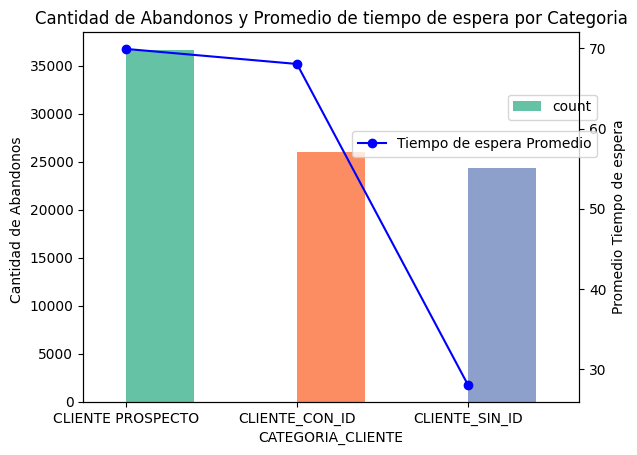

In [229]:
fig, ax1 = plt.subplots()
total_LLAMADAS_abandonadas_sr.plot(kind='bar', ax=ax1, color=custom_palette, position=0, width=0.4)
ax2 = ax1.twinx()
desglose_tiempo_espera_prom_por_categoria.plot(kind='line', ax=ax2, color='b', marker='o', label='Tiempo de espera Promedio')
ax1.set_xlabel('CATEGORIA_CLIENTE')
ax1.set_ylabel('Cantidad de Abandonos ', color='black')
ax2.set_ylabel('Promedio Tiempo de espera', color='black')
plt.title('Cantidad de Abandonos y Promedio de tiempo de espera por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()

##Conclusiones de Tasa de Abandono

Como pudimos ver, el 42% de los llamados que abandonan son llamados que no han podido ser identificados. y el 58% corresponden a clientes sin identificar. Pudimos analizar este comportamiento contra el tiempo de espera en el vru_time y validar que no tiene incidencia en la tasa de abandonos.

Solo podemos decir como conclusión que la tasa de abandono era en principio muy alta pero analizando los datos en corrección podemos ver que la tasa baja del 60% al 20%.

#**COLUMNA TIEMPO DE ESPERA**

## Correccion tiempo total en espera con funcion

In [230]:
def corregir_tiempo_cola_calc(row):
    if row['PRIORIDAD'] == 2:
        modified_value = row['TIEMPO_TOTAL_EN_ESPERA'] - 90
        return max(modified_value, 0)
    else:
        return row['TIEMPO_TOTAL_EN_ESPERA']

df['TIEMPO_TOTAL_EN_ESPERA'] = df.apply(corregir_tiempo_cola_calc, axis=1)

## Descripcion del tiempo de cola calculado

In [231]:
descripcion_TIEMPO_TOTAL_EN_ESPERA = df['TIEMPO_TOTAL_EN_ESPERA'].describe()
descripcion_TIEMPO_TOTAL_EN_ESPERA

,TIEMPO_TOTAL_EN_ESPERA
count,444333.000000
mean,42.300133
std,113.657125
min,0.000000
25%,0.000000
50%,0.000000
75%,44.000000
max,28693.000000


## Graficas: Diagrama de caja outliers de tiempo de cola

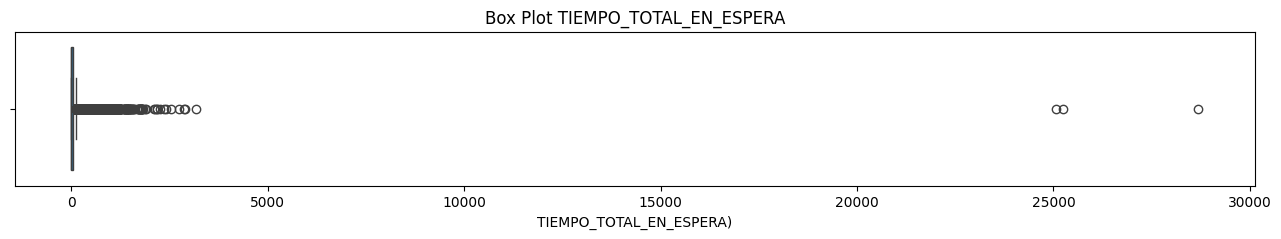

In [232]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['TIEMPO_TOTAL_EN_ESPERA'])
plt.title('Box Plot TIEMPO_TOTAL_EN_ESPERA')
plt.xlabel('TIEMPO_TOTAL_EN_ESPERA)')
plt.show()

## Graficas: Diagrama de franjas outliers de tiempo de cola

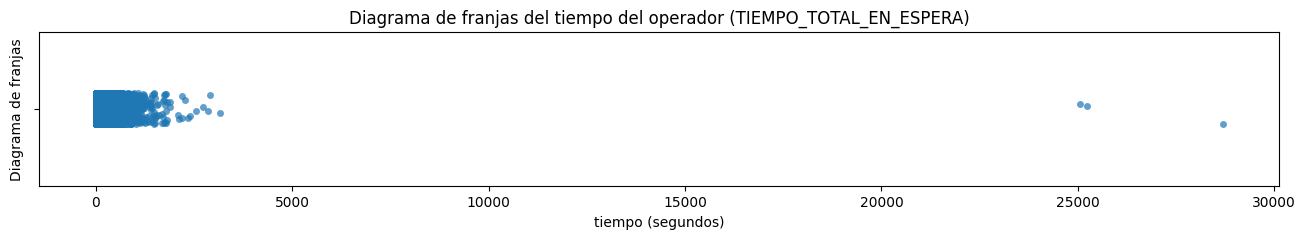

In [233]:
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='TIEMPO_TOTAL_EN_ESPERA', jitter=True, alpha=0.7)
plt.xlabel('tiempo (segundos)')
plt.ylabel('Diagrama de franjas')
plt.title('Diagrama de franjas del tiempo del operador (TIEMPO_TOTAL_EN_ESPERA)')
plt.show()

## Graficas: Diagrama de caja outliers AUMENTADO de tiempo de cola

Text(0.5, 1.0, 'Diagrama de caja ampliado para valores < 30 segundos')

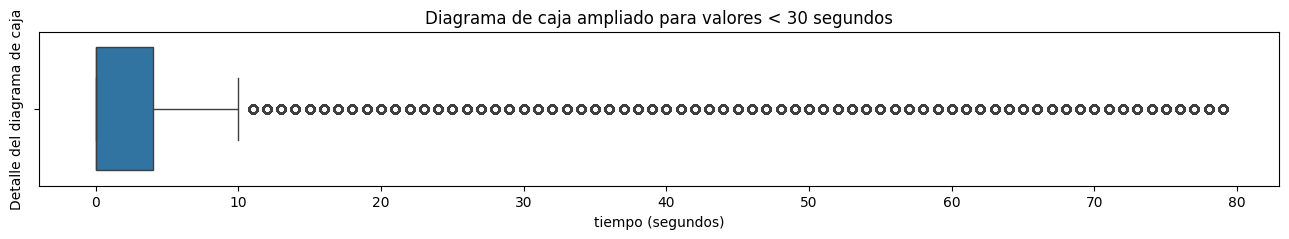

In [234]:
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['TIEMPO_TOTAL_EN_ESPERA'] < 80], x='TIEMPO_TOTAL_EN_ESPERA')
plt.xlabel('tiempo (segundos)')
plt.ylabel('Detalle del diagrama de caja')
plt.title('Diagrama de caja ampliado para valores < 30 segundos')

##Comprobacion de eliminacion de outliers

In [235]:
df = df[df['TIEMPO_TOTAL_EN_ESPERA'] < 20000]
(df['TIEMPO_TOTAL_EN_ESPERA'] > 20000).sum()

0

## Graficas: Diagrama de franjas outliers de tiempo de cola

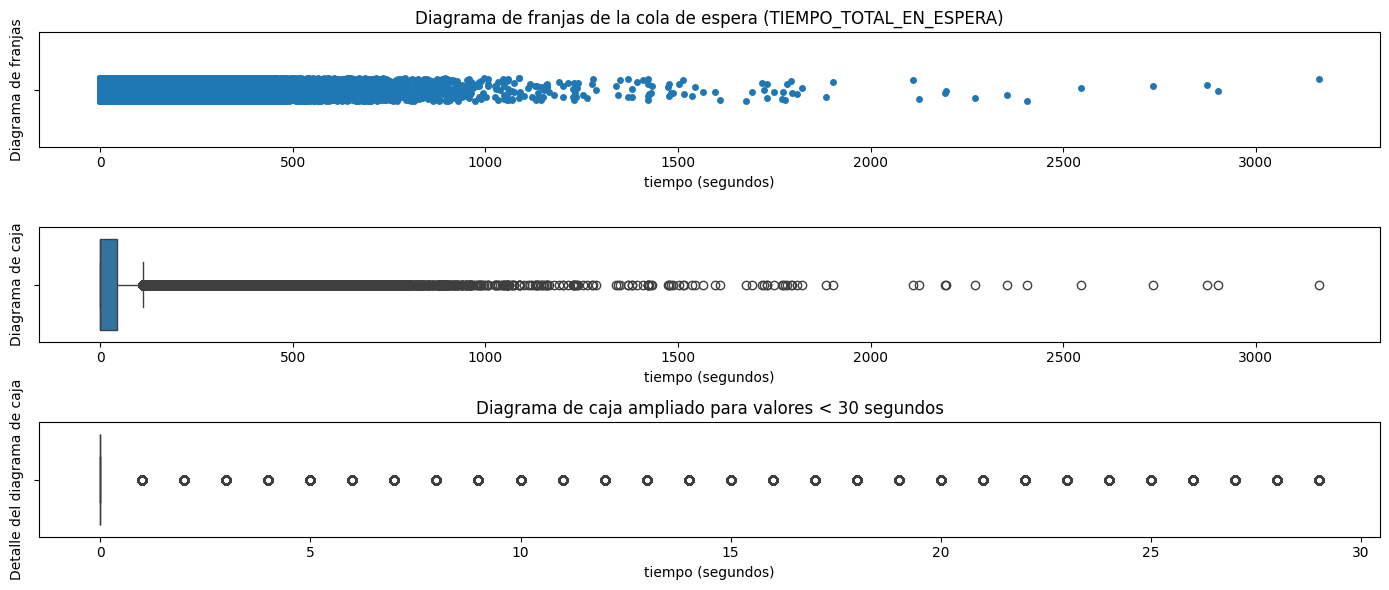

In [236]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='TIEMPO_TOTAL_EN_ESPERA', ax=ax1)
ax1.set_xlabel('tiempo (segundos)') ; ax1.set_ylabel('Diagrama de franjas') ; ax1.set_title('Diagrama de franjas de la cola de espera (TIEMPO_TOTAL_EN_ESPERA)')
ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='TIEMPO_TOTAL_EN_ESPERA', ax=ax2)
ax2.set_xlabel('tiempo (segundos)') ; ax2.set_ylabel('Diagrama de caja')
ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['TIEMPO_TOTAL_EN_ESPERA'] < 30], x='TIEMPO_TOTAL_EN_ESPERA', ax=ax3)
ax3.set_xlabel('tiempo (segundos)') ; ax3.set_ylabel('Detalle del diagrama de caja') ; ax3.set_title('Diagrama de caja ampliado para valores < 30 segundos')
plt.tight_layout()

### Total de ouliers mayores a 2000 segundos

In [237]:
total_outliers_mayor_2000seg = (df['TIEMPO_TOTAL_EN_ESPERA'] > 2000).sum()

### Porcentaje de ouliers mayores a 2000 segundos

In [238]:
porcentaje_outliers_mayor_2000seg = round(total_outliers_mayor_2000seg/df['TIEMPO_TOTAL_EN_ESPERA'].count()*100,2)

### Total de ouliers mayores a 1000 segundos

In [239]:
total_outliers_mayor_1000seg = (df['TIEMPO_TOTAL_EN_ESPERA'] > 1000).sum()

### Porcentaje de ouliers mayores a 1000 segundos

In [240]:
porcentaje_outliers_mayor_1000seg = round(total_outliers_mayor_1000seg/df['TIEMPO_TOTAL_EN_ESPERA'].count()*100,2)

##Comprobacion de eliminacion de outliers

In [241]:
df = df[df['TIEMPO_TOTAL_EN_ESPERA'] <= 1000]
(df['TIEMPO_TOTAL_EN_ESPERA'] > 1000).sum()

0

# Correcciones de TIEMPO_TOTAL_EN_ESPERA por los clientes que abandonan

Ahora vamos a meternos a analizar la distribución de la variable q_time, su comportamiento y luego, la relación de la misma con el volumen de llamadas.
Nuestro objetivo en este apartado será responder si cuando aumenta el caudal de llamadas se incrementan los tiempos de espera en cola, si tienen incidencia en el resultado del servicio.
Es decir, si un aumento en la variable cantidad de llamados por hora hace que aumente el tiempo de espera en cola q_time Por ejemplo, si los clientes prioritarios tienen que tener garantizado el tiempo de espera menor a 1.5 minutos, entonces esta relación es muy importante para poder dimensionar el call center con el objetivo de garantizar el nivel de servicio para estos clientes

## Desglose por tiempo de cola de los clientes que abandonan

In [242]:
tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df = df[df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA'] #23.828 rows
tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,...,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA,HORA_ENTRADA_LLAMADA_VRU_CORR,CATEGORIA_DE_ABANDONO
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1,1999-01-01 00:00:31,ABANDONADO_EN_SERVICIO
2,1999-01-01,33118,27997683.0,AGENTE,2,Actividad Regular,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,...,1999-01-01 06:55:43,1999-01-01 06:56:37,54,AA0101,MICHAL,CLIENTE_CON_ID,1,1,1999-01-01 06:55:20,NO_ABANDONADO


In [243]:
descripcion_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df = tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df['TIEMPO_TOTAL_EN_ESPERA'].describe()
descripcion_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df

,TIEMPO_TOTAL_EN_ESPERA
count,420371.000000
mean,44.086260
std,89.234266
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,997.000000


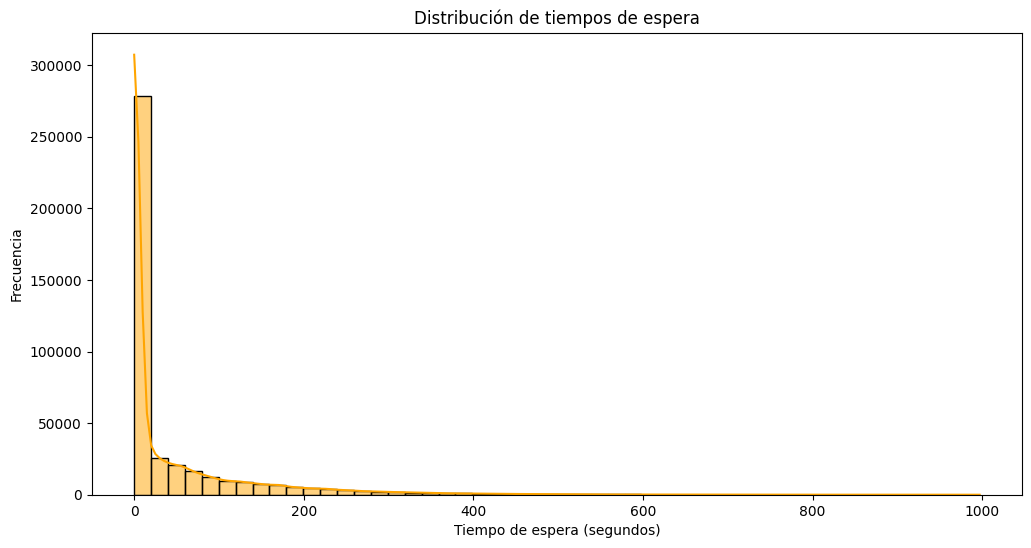

In [244]:
plt.figure(figsize=(12, 6))
sns.histplot(tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df['TIEMPO_TOTAL_EN_ESPERA'], bins=50, kde=True, color='orange')
plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')
plt.show()

In [245]:
descripicion_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO = df['TIEMPO_TOTAL_EN_ESPERA'].describe()
descripicion_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO

,TIEMPO_TOTAL_EN_ESPERA
count,444199.000000
mean,41.721357
std,87.374352
min,0.000000
25%,0.000000
50%,0.000000
75%,44.000000
max,997.000000


In [246]:
tabla_prioridad_2_no_abandonadas_df = tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df[(tabla_ABANDONADO_EN_SERVICIO_Y_NO_ABANDONADO_df['PRIORIDAD'] == 2)]
tabla_prioridad_2_no_abandonadas_df.head(2)

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,...,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA,HORA_ENTRADA_LLAMADA_VRU_CORR,CATEGORIA_DE_ABANDONO
0,1999-01-01,33116,9664491.0,CUELGA,2,Actividad Regular,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AA0101,NO_SERVER,CLIENTE_CON_ID,1,1,1999-01-01 00:00:31,ABANDONADO_EN_SERVICIO
2,1999-01-01,33118,27997683.0,AGENTE,2,Actividad Regular,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,...,1999-01-01 06:55:43,1999-01-01 06:56:37,54,AA0101,MICHAL,CLIENTE_CON_ID,1,1,1999-01-01 06:55:20,NO_ABANDONADO


In [247]:
promedio_tiempo_en_cola_prioridad_2 = tabla_prioridad_2_no_abandonadas_df['TIEMPO_TOTAL_EN_ESPERA'].mean()
promedio_tiempo_en_cola_prioridad_2

32.63044712252205

In [248]:
tabla_prioridad_2_no_abandonadas_df ['TIEMPO_TOTAL_EN_ESPERA'].describe()

,TIEMPO_TOTAL_EN_ESPERA
count,137412.000000
mean,32.630447
std,75.086060
min,0.000000
25%,0.000000
50%,0.000000
75%,27.000000
max,982.000000


## Conclusiones

Sobre los clientes que efectivamente son atendidos, el 80% que permanece:
El tiempo promedio en cola de espera es 89 segundos (1.43 minutos)
El 25% de las llamadas permanecen en cola menos de 1 segundo, son atendidas de inmediato.
El 75% de los clientes en cola espera menos de 1 minuto, 50 segundos.
Sobre los clientes con prioridad ('priority' ==2), que son atendidos, o permanecen en cola hasta ser atendidos:

El total de clientes con prioridad atendidos es de 137.412 llamados, es 99% de los clientes prioritarios que llamaron y fueron identificados
El tiempo promedio de espera en cola para ellos es de 32 segundos equivalente a 0.5 minutos promedio.
El 50% es atendido enseguida, 0 segundos por arriba del nivel de servicio.
El restante 25%, 75% permanece en cola menos de 30 segundos.

## Tabla filtrada de llamadas no abandonada

In [249]:
tabla_filtrada_no_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA') & (df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_SERVICIO')]
tabla_filtrada_no_abandonan

,FECHA,ID_LLAMADA,ID_CLIENTE,TIPO_DE_LLAMADA,PRIORIDAD,TIPO_DE_SERVICIO,HORA_ENTRADA_LLAMADA_VRU,HORA_SALIDA_LLAMADA_VRU,TIEMPO_DE_ESPERA_TOTAL_VRU,HORA_ENTRADA_EN_ESPERA,...,HORA_ENTRADA_EN_SERVICIO,HORA_SALIDA_EN_SERVICIO,TIEMPO_TOTAL_EN_SERVICIO,LINEA_VRU,SERVIDOR,CATEGORIA_CLIENTE,MES,DIA,HORA_ENTRADA_LLAMADA_VRU_CORR,CATEGORIA_DE_ABANDONO
2,1999-01-01,33118,27997683.0,AGENTE,2,Actividad Regular,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,...,1999-01-01 06:55:43,1999-01-01 06:56:37,54,AA0101,MICHAL,CLIENTE_CON_ID,1,1,1999-01-01 06:55:20,NO_ABANDONADO
3,1999-01-01,33119,0.0,AGENTE,0,Actividad Regular,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,...,1999-01-01 07:41:25,1999-01-01 07:44:53,208,AA0101,BASCH,CLIENTE_SIN_ID,1,1,1999-01-01 07:41:16,NO_ABANDONADO
4,1999-01-01,33120,0.0,AGENTE,0,Actividad Regular,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,...,1999-01-01 08:03:23,1999-01-01 08:05:10,107,AA0101,MICHAL,CLIENTE_SIN_ID,1,1,1999-01-01 08:03:14,NO_ABANDONADO
5,1999-01-01,33121,0.0,AGENTE,0,Actividad Regular,1999-01-01 08:18:42,1999-01-01 08:18:51,9,1999-01-01 00:00:00,...,1999-01-01 08:18:50,1999-01-01 08:23:25,275,AA0101,KAZAV,CLIENTE_SIN_ID,1,1,1999-01-01 08:18:42,NO_ABANDONADO
6,1999-01-01,33122,0.0,AGENTE,0,Actividad Regular,1999-01-01 08:28:33,1999-01-01 08:28:43,10,1999-01-01 00:00:00,...,1999-01-01 08:28:42,1999-01-01 08:30:24,102,AA0101,KAZAV,CLIENTE_SIN_ID,1,1,1999-01-01 08:28:33,NO_ABANDONADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444438,1999-12-31,17206,0.0,AGENTE,0,Consulta por internet,1999-12-31 11:40:37,1999-12-31 11:40:46,9,1999-12-31 11:40:46,...,1999-12-31 11:41:43,1999-12-31 11:51:52,609,AA0216,Z2ARIE,CLIENTE_SIN_ID,12,31,1999-12-31 11:40:37,NO_ABANDONADO
444439,1999-12-31,17207,0.0,AGENTE,0,Consulta por internet,1999-12-31 12:37:47,1999-12-31 12:38:04,17,1999-12-31 00:00:00,...,1999-12-31 12:38:03,1999-12-31 12:41:07,184,AA0216,Z2ARIE,CLIENTE_SIN_ID,12,31,1999-12-31 12:37:47,NO_ABANDONADO
444440,1999-12-31,17208,0.0,AGENTE,0,Consulta por internet,1999-12-31 12:59:03,1999-12-31 12:59:19,16,1999-12-31 00:00:00,...,1999-12-31 12:59:18,1999-12-31 13:05:47,389,AA0216,Z2ARIE,CLIENTE_SIN_ID,12,31,1999-12-31 12:59:03,NO_ABANDONADO
444441,1999-12-31,17209,0.0,AGENTE,0,Consulta por internet,1999-12-31 13:18:00,1999-12-31 13:18:14,14,1999-12-31 00:00:00,...,1999-12-31 13:18:13,1999-12-31 13:18:30,17,AA0216,Z2ARIE,CLIENTE_SIN_ID,12,31,1999-12-31 13:18:00,NO_ABANDONADO


## Desglose de llamadas no abandonadas

In [250]:
desglose_llamadas_no_abandonada = tabla_filtrada_no_abandonan['CATEGORIA_CLIENTE'].value_counts()
desglose_llamadas_no_abandonada

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,172881
CLIENTE_SIN_ID,142668
CLIENTE PROSPECTO,41678


## Cantidad total de llamadas no abandonadas

In [251]:
total_llamadas_no_abandonadas = tabla_filtrada_no_abandonan['ID_CLIENTE'].count()
total_llamadas_no_abandonadas

357199

##Desglose promedio sin tiempo de espera

In [252]:
desglose_promedio_sin_tiempo_de_espera  = tabla_filtrada_no_abandonan.groupby('CATEGORIA_CLIENTE')['TIEMPO_TOTAL_EN_ESPERA'].mean()
desglose_promedio_sin_tiempo_de_espera

,TIEMPO_TOTAL_EN_ESPERA
CATEGORIA_CLIENTE,
CLIENTE PROSPECTO,78.763496
CLIENTE_CON_ID,57.837663
CLIENTE_SIN_ID,8.817689


##Desglose total CATEGORIA NO ABANDONA

In [253]:
desglose_total_categoria_no_abandona = tabla_filtrada_no_abandonan['CATEGORIA_CLIENTE'].value_counts()
desglose_total_categoria_no_abandona

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,172881
CLIENTE_SIN_ID,142668
CLIENTE PROSPECTO,41678


##Cantidad total CATEGORIA NO ABANDONA

In [254]:
total_categoria_no_abandona= desglose_total_categoria_no_abandona.sum()
total_categoria_no_abandona

357227

## Desglose de porcentaje de CATEGORIA NO ABANDONA

In [255]:
desglose_porcentaje_categoria_no_abandona = round((desglose_total_categoria_no_abandona / total_ID_CLIENTE) * 100,0)
desglose_porcentaje_categoria_no_abandona

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,39.0
CLIENTE_SIN_ID,32.0
CLIENTE PROSPECTO,9.0


### Tabla dataframe de numero y porcentajes de clientes por categoria

In [256]:
tabla_numero_porcentajes_clientes_categoria = pd.DataFrame({'Total': desglose_total_categoria_no_abandona , 'Porcentaje': desglose_porcentaje_categoria_no_abandona})
tabla_numero_porcentajes_clientes_categoria

,Total,Porcentaje
CATEGORIA_CLIENTE,,
CLIENTE_CON_ID,172881,39.0
CLIENTE_SIN_ID,142668,32.0
CLIENTE PROSPECTO,41678,9.0


## Grafica: Diagrama de barras Cantidad de llamadas por Categoria de cliente

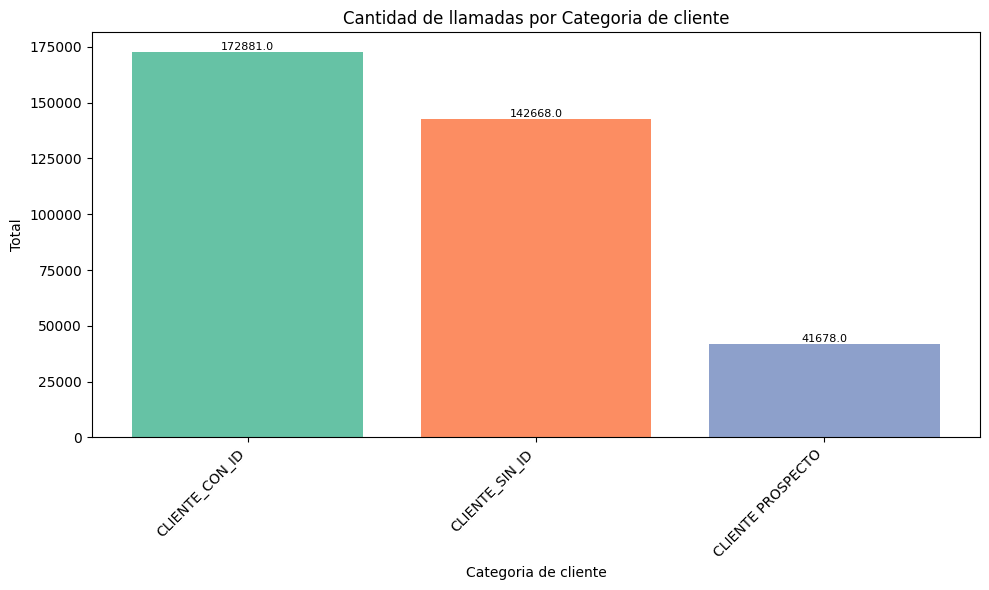

In [259]:
tabla_numero_porcentajes_clientes_categoria_sorted = tabla_numero_porcentajes_clientes_categoria.sort_values(by='Total', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(tabla_numero_porcentajes_clientes_categoria_sorted.index, tabla_numero_porcentajes_clientes_categoria_sorted['Total'], color=custom_palette)
plt.xlabel('Categoria de cliente')
plt.ylabel('Total')
plt.title('Cantidad de llamadas por Categoria de cliente')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

## Graficas: Diagrama de barras Cantidad llamadas y Promedio de TIEMPO_TOTAL_EN_ESPERA por Categoria

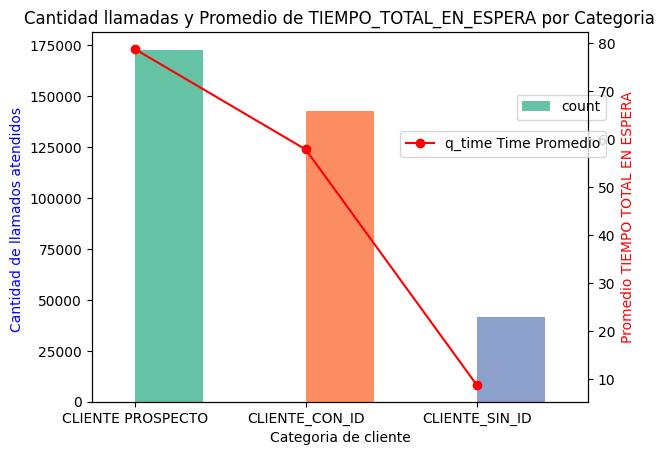

In [261]:
fig, ax1 = plt.subplots()
desglose_total_categoria_no_abandona.plot(kind='bar', ax=ax1, color=custom_palette, position=0, width=0.4)
ax2 = ax1.twinx()
desglose_promedio_sin_tiempo_de_espera.plot(kind='line', ax=ax2, color='r', marker='o', label='q_time Time Promedio')
ax1.set_xlabel('Categoria de cliente')
ax1.set_ylabel('Cantidad de llamados atendidos ', color='b')
ax2.set_ylabel('Promedio TIEMPO TOTAL EN ESPERA', color='r')
plt.title('Cantidad llamadas y Promedio de TIEMPO_TOTAL_EN_ESPERA por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()


## Conclusiones

La tasa de servicio para las llamadas que no abandonan, el 80% de las llamadas, es muy bueno. Esta muy por debajo de lo prometido para los clientes prioritarios, y de hecho se cumple para todos los clientes prioritarios o no.

Es decir, el 75% de los clientes, sean o no prioritarios son atendidos en menos de 50 segundos, con un tiempo promedio en cola de 89 segundos = 1.43 minutos
Por lo tanto se da un servicio premium a todos los clientes sin distinción.

# **COLUMNA TIPO DE LLAMADA**

## Desglose tipo de llamada

In [262]:
desglose_tipo_de_llamada_sr = df['TIPO_DE_LLAMADA'].value_counts()
desglose_tipo_de_llamada_sr

,count
TIPO_DE_LLAMADA,
AGENTE,353082
CUELGA,87526
FANTASMA,3591


## Graficas

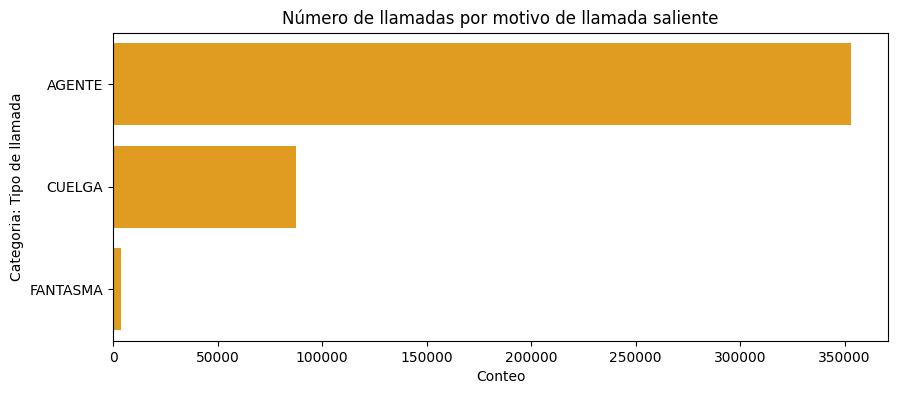

In [263]:
plt.figure(figsize=(10, 4))
sns.barplot(x=desglose_tipo_de_llamada_sr.values, y=desglose_tipo_de_llamada_sr.index, color='orange')
plt.xlabel('Conteo')
plt.ylabel('Categoria: Tipo de llamada')
plt.title('Número de llamadas por motivo de llamada saliente')
plt.show()

## Conclusiones

Se observan 3 categorías de posibles salidas de las llamadas tal lo informado:

La categoría predominante es AGENT que significa que se dio servicio.
Esto ocurre en el 79% de las llamadas.
Alrededor del 20% son llamados donde el cliente cortó o no se dio el servicio.
Hay 3 posibilidades de resolucion de una llamada:

AGENT = el 79% de las llamadas
HANG = el 20% de las llamadas ingresadas.
PHANTOM = Son 4.440 llamadas en total, un promedio de 12 llamadas por dia. Un 1% (una llamada en la que virtualmente se ignora)

# **COLUMNAS: HORA DE ENTRADA Y SALIDA DE SERVICIO**

## Tabla dataframe desglosada por hora de entrada en servicio

In [264]:
tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_SERVICIO'] = tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_SERVICIO'].dt.hour

## Tabla dataframe desglosada por hora de salida en servicio

In [265]:
tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_SERVICIO'] = tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_SERVICIO'].dt.hour

## Graficas: Histogramas hora de entrada y salida en servicio

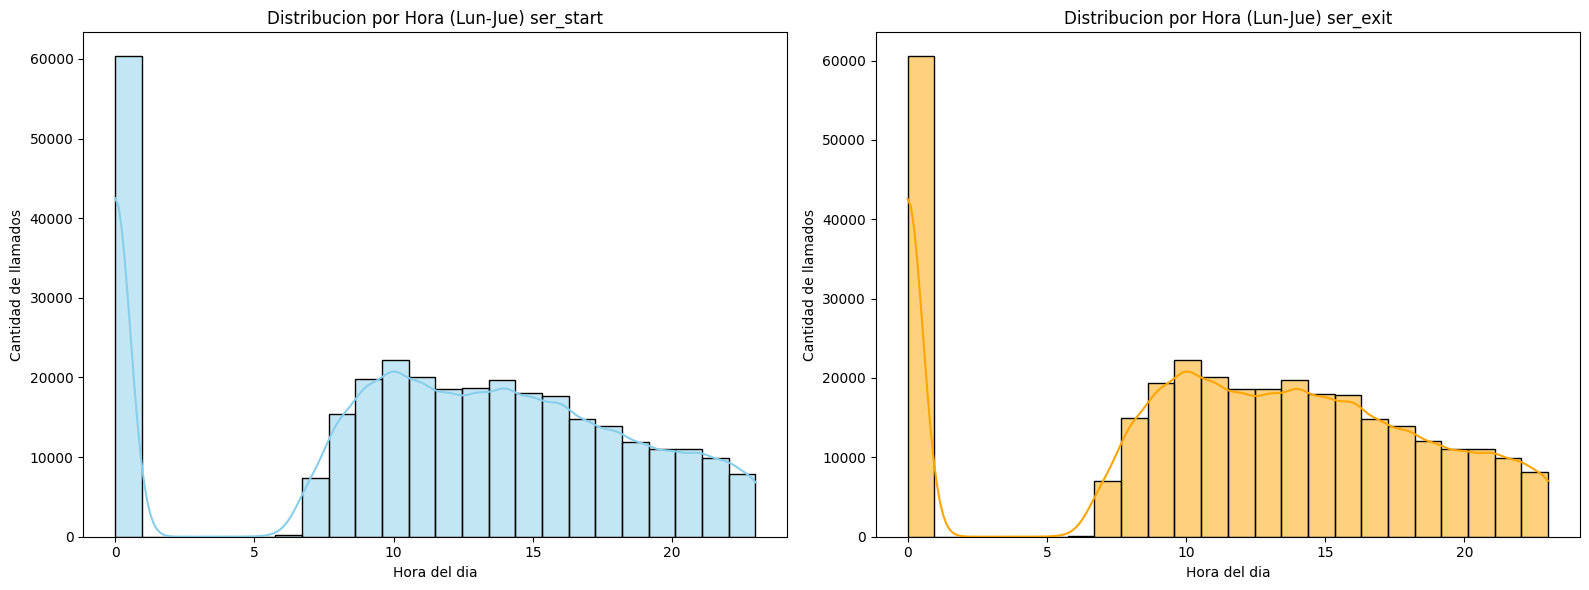

In [266]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(tabla_HORA_lun_a_jue_df['HORA_ENTRADA_EN_SERVICIO'], bins=24, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) ser_start')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')
sns.histplot(tabla_HORA_lun_a_jue_df['HORA_SALIDA_EN_SERVICIO'], bins=24, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) ser_exit')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')
plt.tight_layout()
plt.show()

## Tabla dataframe desglosada llamadas prioritarias no abandonan

In [294]:
tabla_dataframe_prioritarias_no_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] =='NO_ABANDONADO') & (df['PRIORIDAD'] == 2)]

## Promedio llamadas prioritarias no abandonan

In [268]:
promedio_prioritarias_no_abandonan = tabla_dataframe_prioritarias_no_abandonan['TIEMPO_TOTAL_EN_SERVICIO'].mean()
promedio_prioritarias_no_abandonan

208.31644015411322

## Descripcion estadistica llamadas prioritarias no abandonan

In [269]:
descripcion_prioritarias_no_abandonan= tabla_dataframe_prioritarias_no_abandonan['TIEMPO_TOTAL_EN_SERVICIO'].describe()
descripcion_prioritarias_no_abandonan

,TIEMPO_TOTAL_EN_SERVICIO
count,118095.000000
mean,208.316440
std,285.399565
min,0.000000
25%,67.000000
50%,131.000000
75%,254.000000
max,30278.000000


#**COLUMNA TIEMPO EN SERVICIO TOTAL**

## Descripcion estadistica tiempo total en servicio

In [270]:
descripcion_tiempo_servicio_sr =df['TIEMPO_TOTAL_EN_SERVICIO'].describe()
descripcion_tiempo_servicio_sr

,TIEMPO_TOTAL_EN_SERVICIO
count,444199.000000
mean,152.387970
std,263.423452
min,0.000000
25%,12.000000
50%,84.000000
75%,185.000000
max,36291.000000


## Graficas: Diagrama de caja tiempo total en servicio

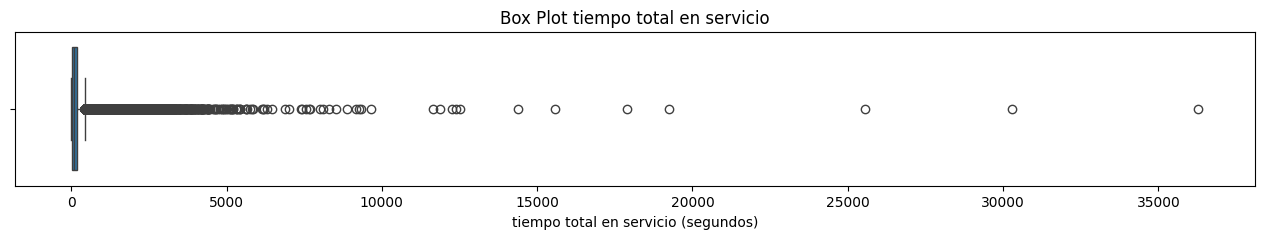

In [271]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['TIEMPO_TOTAL_EN_SERVICIO'])
plt.title('Box Plot tiempo total en servicio')
plt.xlabel('tiempo total en servicio (segundos)')
plt.show()

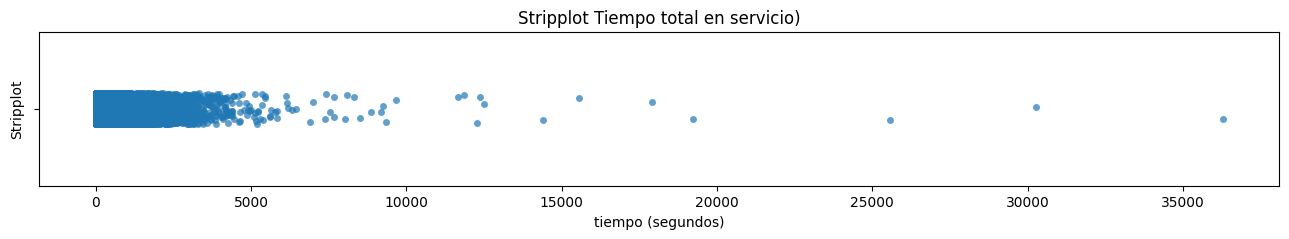

In [272]:
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='TIEMPO_TOTAL_EN_SERVICIO', jitter=True, alpha=0.7)
plt.xlabel('tiempo (segundos)')
plt.ylabel('Stripplot')
plt.title('Stripplot Tiempo total en servicio)')
plt.show()

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

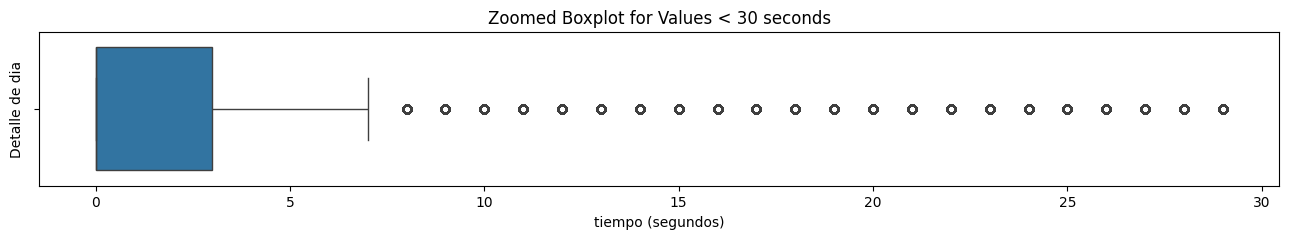

In [273]:
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['TIEMPO_TOTAL_EN_SERVICIO'] < 30], x='TIEMPO_TOTAL_EN_SERVICIO')
plt.xlabel('tiempo (segundos)')
plt.ylabel('Detalle de dia')
plt.title('Zoomed Boxplot for Values < 30 seconds')

## Total clientes que abandonan en servicio

In [274]:
total_abandonos_en_servicio = (df['TIEMPO_TOTAL_EN_SERVICIO'] == 0).sum()
total_abandonos_en_servicio


87682

## Porcentaje clientes que abandonan en servicio

In [275]:
porcentaje_abandonos_en_servicio  = round(total_abandonos_en_servicio/df['TIEMPO_TOTAL_EN_SERVICIO'].count()*100,2)
porcentaje_abandonos_en_servicio

19.74

## Total de Ouliers mayores a 25000 segundos

In [276]:
total_ouliers_mayores_25000seg = (df['TIEMPO_TOTAL_EN_SERVICIO'] > 25000).sum()
total_ouliers_mayores_25000seg

3

## Porcentaje de Ouliers mayores a 25000 segundos

In [277]:
porcenaje_ouliers_mayores_25000seg = round(total_ouliers_mayores_25000seg /df['TIEMPO_TOTAL_EN_SERVICIO'].count()*100,2)
porcenaje_ouliers_mayores_25000seg

0.0

## Total de Ouliers mayores a 1000 segundos

In [278]:
total_ouliers_mayores_1000seg = (df['TIEMPO_TOTAL_EN_SERVICIO'] > 1000).sum()
total_ouliers_mayores_1000seg

5790

## Porcentaje de Ouliers mayores a 1000 segundos

In [279]:
porcenaje_ouliers_mayores_1000seg = round(total_ouliers_mayores_1000seg/df['TIEMPO_TOTAL_EN_SERVICIO'].count()*100,2)
porcenaje_ouliers_mayores_1000seg

1.3

## Chequeo

In [280]:
df = df[df['TIEMPO_TOTAL_EN_SERVICIO'] <= 1000]
(df['TIEMPO_TOTAL_EN_SERVICIO'] > 1000).sum()

0

## Descripcion tiempo total en servicio

In [281]:
df['TIEMPO_TOTAL_EN_SERVICIO'].describe()

,TIEMPO_TOTAL_EN_SERVICIO
count,438409.000000
mean,133.687326
std,165.010813
min,0.000000
25%,10.000000
50%,82.000000
75%,178.000000
max,1000.000000


# **LINEA_VRU**

## Cantidad total de linea VRU

In [282]:
total_LINEA_VRU = df['LINEA_VRU'].nunique()
total_LINEA_VRU

30

## Desglose linea VRU

In [283]:
desglose_Linea_VRU_sr = df['LINEA_VRU'].value_counts()

## Graficas: Grafico circular Porcentaje de lineas en uso

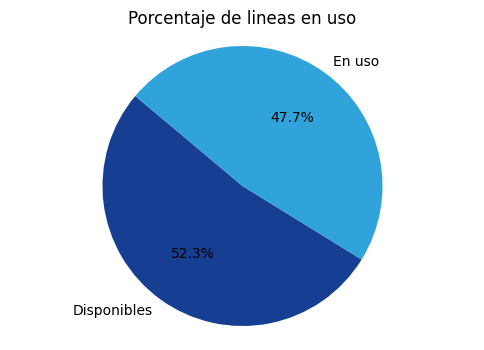

In [284]:
datos = {'Status': ['Disponibles', 'En uso'],
        'Contar': [34, 31]}
df_vru = pd.DataFrame(datos)
df_vru['Porcentaje'] = (df_vru['Contar'] / df_vru['Contar'].sum()) * 100
colors = ['#163E93', '#30A3DA']
plt.figure(figsize=(6, 4))
plt.pie(df_vru['Porcentaje'], labels=df_vru['Status'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de lineas en uso')
plt.axis('equal')
plt.show()

## Graficas: Diagrama de barras: Frecuencias de Linea VRU

<ipython-input-285-e32854c6379d>:3: UserWarning: 
The palette list has fewer values (12) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='LINEA_VRU', data=df, order=df['LINEA_VRU'].value_counts().index,hue='LINEA_VRU',palette=custom_palette)


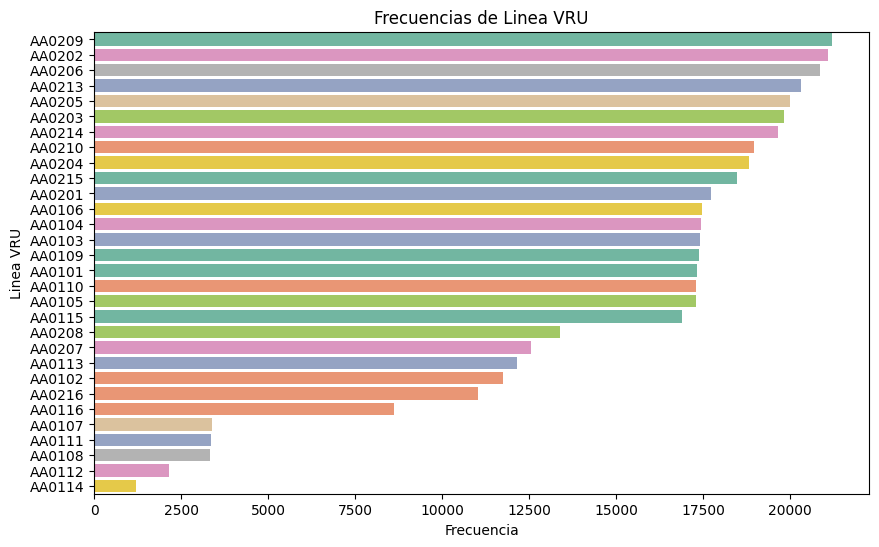

In [285]:
import random
plt.figure(figsize=(10, 6))
sns.countplot(y='LINEA_VRU', data=df, order=df['LINEA_VRU'].value_counts().index,hue='LINEA_VRU',palette=custom_palette)
plt.xlabel('Frecuencia')
plt.title('Frecuencias de Linea VRU')
plt.xlabel('Frecuencia')
plt.ylabel('Linea VRU')
plt.show()

# **COLUMNA SERVIDOR**

## Total unica

In [286]:
total_unica_SERVIDOR = df['SERVIDOR'].nunique()
total_unica_SERVIDOR

53

## Desglosado

In [287]:
desglosado_SERVIDOR = df['SERVIDOR'].value_counts()

## Cantidad total

In [288]:
total_SERVIDOR= df['SERVIDOR'].value_counts().sum()
total_SERVIDOR

438409

## Tabla desglose SERVIDOR

In [289]:
tabla_desglose_SERVIDOR = pd.DataFrame({'Categoria': desglosado_SERVIDOR.index, 'Conteo': desglosado_SERVIDOR.values})

## Top 5 SERVIDOR

In [290]:
top5_SERVIDOR = df['SERVIDOR'].value_counts()[:5]
top5_SERVIDOR

,count
SERVIDOR,
NO_SERVER,96274
SHARON,27350
STEREN,20338
AVNI,19787
MORIAH,19422


## Graficas: Diagrama de barras Top 5 SERVIDOR

<ipython-input-291-5d893fe9efe7>:2: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.barplot(x=top5_SERVIDOR.values, y=top5_SERVIDOR.index.tolist(), hue=top5_SERVIDOR.index.tolist(), palette=custom_palette, dodge=False)


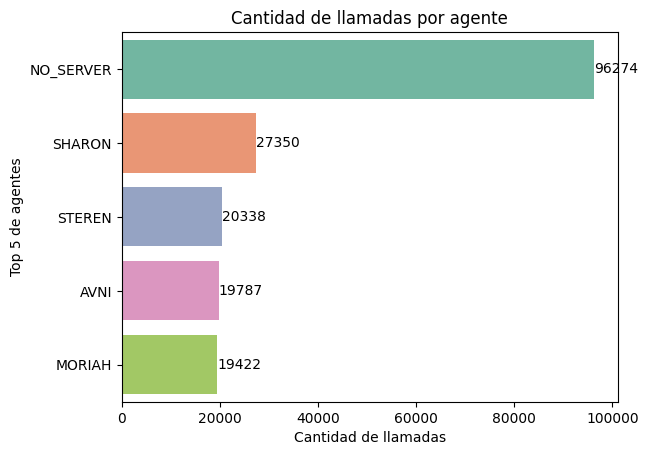

In [291]:
colors = paleta_de_colores
sns.barplot(x=top5_SERVIDOR.values, y=top5_SERVIDOR.index.tolist(), hue=top5_SERVIDOR.index.tolist(), palette=custom_palette, dodge=False)
for i, count in enumerate(top5_SERVIDOR):
    plt.text(count, i, str(count), ha='left', va='center')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Top 5 de agentes')
plt.title('Cantidad de llamadas por agente')
plt.show()

## Top 5 SERVIDOR

In [292]:
top5_SERVIDOR = df['SERVIDOR'].value_counts()[:5]
top5_SERVIDOR

,count
SERVIDOR,
NO_SERVER,96274
SHARON,27350
STEREN,20338
AVNI,19787
MORIAH,19422


## Porcentaje Top 5 SERVIDOR

In [293]:
tabla_porcentaje_top5 = round(((df['SERVIDOR'].value_counts() / len(df)) * 100),2)[:5]
tabla_porcentaje_top5

,count
SERVIDOR,
NO_SERVER,21.96
SHARON,6.24
STEREN,4.64
AVNI,4.51
MORIAH,4.43


#**CONCLUSIONES FINALES**

Tras el análisis de los datos y la resolución de las preguntas planteadas, se han obtenido las siguientes conclusiones:

Calidad de los datos: Se identificaron numerosas inconsistencias en los datos proporcionados por el Call Center. Se logró detectar algunos outliers con facilidad, pero otro grupo significativo de posibles outliers no pudo ser claramente clasificado debido al alto volumen de llamadas. Además, se encontraron categorías mal escritas en los registros.

Servicio a clientes de alta prioridad: Se confirmó que los clientes de alta prioridad reciben un mejor servicio en comparación con los clientes regulares. Sin embargo, se considera que se puede mejorar aún más, apuntando a un tiempo de espera promedio entre 20 y 25 segundos, en lugar de los 32 segundos actuales.

Cuellos de botella: No se identificaron cuellos de botella significativos en las bandas horarias. El volumen de servicios muestra una tendencia de inicio lento a partir de las siete de la mañana, alcanza su punto más alto cerca del mediodía y luego disminuye de manera uniforme hasta el cierre del Call Center a las doce de la noche.

Llamadas fuera del horario laboral: Se detectaron llamadas que ocurrieron fuera del horario laboral, es decir, después del cierre y antes de la apertura del Call Center. Sería necesario revisar la razón de esto, por si es algun fallo en el sistema de registro.

Volumen de llamadas: El Call Center atiende un volumen de llamadas que oscila entre 31,000 y 42,000 llamadas mensuales, con un promedio de 36001 llamadas por mes.

Pérdida de volumen en ciertos meses: Se observó una disminución considerable del volumen de llamadas en los meses de Abril y Septiembre, donde se registró una pérdida de más del 15% con respecto al mes anterior con una drástica corrección al mes siguiente. Sería relevante investigar las razones detrás de esta disminución y verificar si no se repite en años.

Productividad de los agentes: La información dada por el dataset y el diccionario de datos es muy inconsistente entre sí, con muchos datos mal escritos y outliers. Asimismo, el servicio dado por los agentes tampoco se consideró rápido, en especialmente para los clientes de alta prioridad los cuales tuvieron llamadas en promedio de hasta tres minutos y medio.

Sistema de retroalimentación: Se recomendó instalar un sistema de retroalimientación en el que los usuarios puedan evaluar la caldiad del servicio del agente para que el Call Center tenga más control sobre la calidad individual de cada uno. Por ejemplo: encuestas por operadora o formularios web al finalizar la llamada.

Actualización del Diccionario de Datos: Se encontró que parte de los datos proporcionados en el Diccionario de Datos no coinciden con los datos presentes en el Dataset, como el volumen de llamadas mensual o el total de llamadas al año. Por lo tanto, se sugiere actualizar el diccionario para mantenerlo coherente con los datos reales.

Demanda de servicios: Se identificó que el servicio "Regular" es el más destacado en el Call Center, seguido por los servicios para clientes potenciales, consultas por internet y actividades de acciones. El servicio dado en inglés es el menos demandado.

Clientes recurrentes: Se confirmó la existencia de clientes regulares, algunos con más de 25 llamadas realizadas durante el año, e incluso se encontraron clientes con más de 100 llamadas. También se detectaron clientes con una actividad sospechosa al tener más de 200 llamadas realizadas durante el año, lo que sugiere la necesidad de revisar el sistema para verificar la identificación adecuada de los clientes o posibles problemas en el sistema.